#Tugas Besar Mata Pelajaran Machine Learning
Pemodelan Dataset Boston House dengan Decision Tree, Random Forest, dan AdaBoost
Kelompok: ....
Anggota:
1. Riodino Raihan
2. Faiq Misbah Yazdi
3. Puguh Aiman

Dataset: boston-house-prices

link dataset: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Tujuan:

Tujuan dari Tugas Besar ini adalah untuk membangun dan mengevaluasi model prediksi harga rumah di Boston menggunakan algoritma Machine Learning. Model yang digunakan meliputi Decision Tree, Random Forest, dan AdaBoost Regressor, dengan fokus utama pada implementasi AdaBoost untuk mencapai performa prediksi yang optimal.

Melalui tugas ini, kami bertujuan untuk:

- Memahami dan mempraktikkan tahapan preprocessing, pemodelan, tuning hyperparameter, dan evaluasi model Machine Learning.
- Membandingkan performa dari ketiga model dalam memprediksi harga median rumah (MEDV) menggunakan metrik seperti R² Score dan MSE (Mean Squared Error).
- Menerapkan teknik visualisasi dan interpretasi model untuk menganalisis hasil prediksi serta pengaruh fitur (feature importance) terhadap output model.
- Menyusun implementasi antarmuka interaktif berbasis Streamlit untuk menampilkan performa model dan memfasilitasi pengguna dalam melakukan prediksi harga rumah berdasarkan input variabel.

Konten
Setiap catatan dalam database menggambarkan pinggiran kota atau kota di Boston. Data diambil dari Wilayah Statistik Metropolitan Standar (SMSA) Boston pada tahun 1970. Atribut didefinisikan sebagai berikut (diambil dari Repositori Pembelajaran Mesin UCI1):

- CRIM: tingkat kejahatan per kapita per kota
- ZN: proporsi tanah perumahan yang diperuntukkan bagi kavling lebih dari 25.000 kaki persegi.
- INDUS: proporsi hektar bisnis non-ritel per kota
- CHAS: Variabel dummy Sungai Charles (= 1 jika jalur berbatasan dengan sungai; 0 jika tidak)
- NOX: konsentrasi oksida nitrat (bagian per 10 juta) 1https://archive.ics.uci.edu/ml/datasets/Housing 123 20.2. Memuat Dataset 124
- RM: rata-rata jumlah kamar per tempat tinggal
- AGE: proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940
- DIS: jarak berbobot ke lima pusat pekerjaan Boston
- RAD: indeks aksesibilitas ke jalan raya radial
- TAX: tarif pajak properti nilai penuh per $10.000
- PTRATIO: rasio murid-guru per kota 12. B: 1000(Bk−0.63)2 di mana Bk adalah proporsi warga kulit hitam per kota 13. LSTAT: % status populasi yang lebih rendah.
- MEDV: Nilai median rumah yang ditempati pemilik dalam ribuan dolar Kita dapat melihat bahwa atribut input memiliki campuran unit.

In [ ]:
# Import Kaggle Dataset
import kagglehub
vikrishnan_boston_house_prices_path = kagglehub.dataset_download('vikrishnan/boston-house-prices')

print('Data source import complete.')


Data source import complete.


# A. Data Preprocessing dan Eksplorasi Data:
Melakukan tahap preprocessing data untuk memastikan kualitas dataset, lalu lakukan eksplorasi data untuk mengetahui profil dataset.

# Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print("Library berhasil diimport 🙏")

Library berhasil diimport 🙏


## Membaca dan Eksplorasi Dataset

In [ ]:
# Lihat bentuk asli dari datasett
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv')

# Tampilkan 5 data pertama dan 5 data terakhir
print(df.head())
print(df.tail())

  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             
    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
500   0.06263   0.00  11.930  0  0.5730  6.5930  69...                                             
501   0.04527   0.00  11.930  0  0.5730  6.1200  76...                                             
502   0.06076   0.00  11.930  0  0.5730  6.9760  91...                                             
503   0.1095

In [ ]:
# header=none agar pandas tidak membaca baris pertama sebagai nama kolom karena dataset tidak memiliki nama kolom.
# delimiter = '\s+ agar pandas membaca satu atau lebih whitespace, bukan koma atau tab, yang biasanya digunakan pada file .csv.
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, delimiter='\s+')

# Membuat nama kolom berdasarkan deskripsi dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

# Tampilkan 5 data pertama dan 5 data terakhir
print(df.head())
print(df.tail())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889   

## Informasi Umum Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Perintah df.info() menunjukkan bahwa dataset ini terdiri dari 506 baris dan 14 kolom, di mana setiap kolom memiliki data yang lengkap tanpa adanya nilai yang hilang (non-null). Sebagian besar kolom menggunakan tipe data angka desimal (float64), sementara beberapa kolom lainnya menggunakan angka bulat (int64). Dataset ini memerlukan memori sebesar 55.5 KB, yang menunjukkan bahwa ukuran dataset relatif kecil. Informasi ini memberikan gambaran umum tentang struktur dan tipe data dalam dataset, yang penting untuk memastikan bahwa data siap digunakan untuk analisis lebih lanjut.

## Informasi General Statistik  

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Perintah df.describe() memberikan gambaran statistik dasar dari setiap kolom dalam dataset. Ini mencakup informasi seperti jumlah data yang ada, rata-rata, standar deviasi, nilai terkecil, kuartil pertama, median, kuartil ketiga, dan nilai terbesar untuk setiap kolom. Informasi ini membantu untuk memahami sebaran dan variasi data, serta mengidentifikasi apakah ada nilai ekstrim atau pencilan dalam dataset.

## Mengetahui Missing Value dalam Dataset

In [ ]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Perintah df.isnull().sum() digunakan untuk memeriksa apakah ada nilai yang hilang (missing value) dalam dataset. Hasil yang ditampilkan menunjukkan bahwa untuk semua kolom dalam dataset, jumlah nilai yang hilang adalah 0. Ini berarti tidak ada data yang kosong atau hilang di dalam dataset, sehingga kita tidak perlu khawatir tentang nilai yang hilang sebelum melanjutkan ke tahap analisis atau pembuatan model.

## Korelasi antara Fitur dengan Heatmap

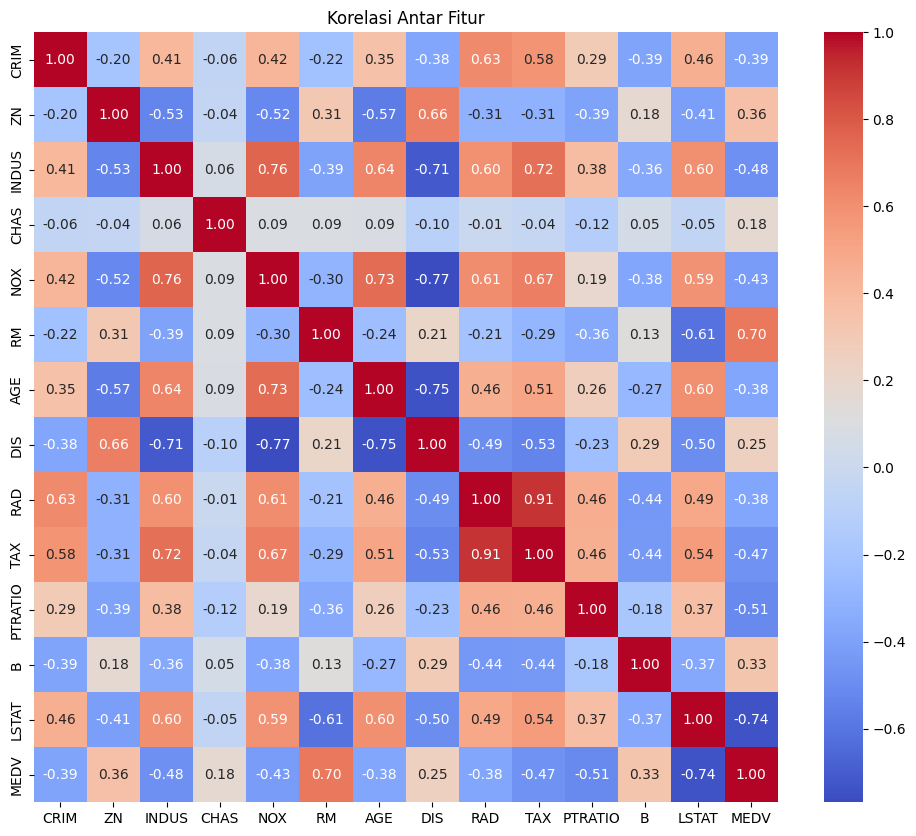

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

**- Korelasi:**

Angka-angka yang terlihat di dalam heatmap adalah nilai korelasi Pearson antara dua fitur. Korelasi ini mengukur sejauh mana dua variabel bergerak bersama-sama:
1. Nilai 1.00 menunjukkan korelasi positif sempurna, yang berarti kedua variabel selalu bergerak dalam arah yang sama.
2. Nilai -1.00 menunjukkan korelasi negatif sempurna, yang berarti satu variabel bergerak berlawanan dengan yang lainnya.
3. Nilai 0.00 menunjukkan tidak ada korelasi sama sekali antara dua variabel.

**- Warna pada Heatmap:**

Warna pada heatmap mewakili nilai korelasi tersebut:
1. Warna merah menunjukkan korelasi positif yang lebih tinggi (nilai mendekati +1).
2. Warna biru menunjukkan korelasi negatif yang lebih tinggi (nilai mendekati -1).
3. Warna putih atau cerah menunjukkan korelasi rendah atau mendekati nol (nilai mendekati 0).

**- Interpretasi:**

Misalnya, di heatmap ini, kolom RM (jumlah kamar per rumah) memiliki korelasi tinggi dengan MEDV (harga rumah), yang berarti semakin banyak kamar, semakin tinggi harga rumah.

Di sisi lain, kolom CRIM (tingkat kriminalitas) memiliki korelasi negatif yang kuat dengan MEDV, yang berarti bahwa area dengan tingkat kriminalitas tinggi cenderung memiliki harga rumah yang lebih rendah.

**- Fungsi Heatmap:**

Heatmap ini memungkinkan kita untuk cepat melihat korelasi antar fitur tanpa perlu memeriksa setiap nilai korelasi secara manual. Ini membantu dalam memilih fitur yang relevan untuk model prediksi atau dalam memahami hubungan antar variabel dalam dataset.

## Cek Outlier

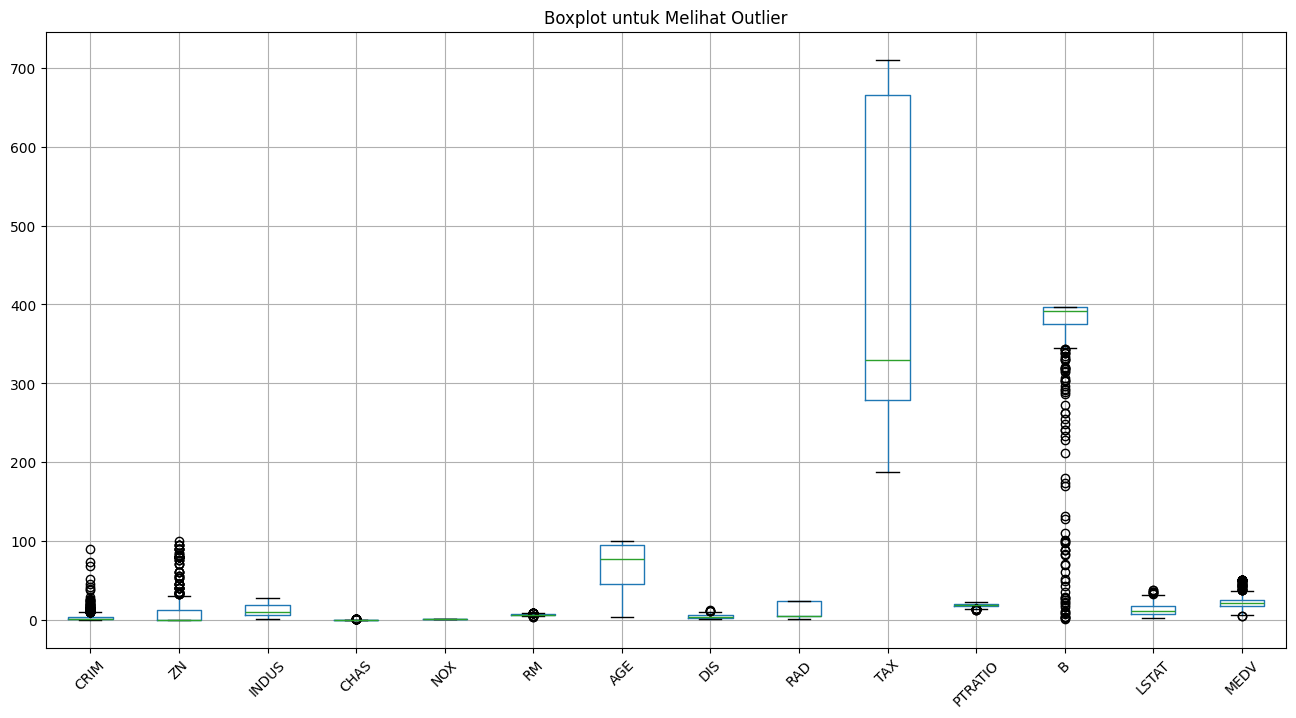

=== Jumlah Outlier per Kolom ===
   Feature Outlier_Count
0     CRIM            66
0       ZN            68
0    INDUS             0
0     CHAS            35
0      NOX             0
0       RM            30
0      AGE             0
0      DIS             5
0      RAD             0
0      TAX             0
0  PTRATIO            15
0        B            77
0    LSTAT             7
0     MEDV            40

🔥 Jumlah total baris yang mengandung outlier: 238
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
18    0.80271  0.0   8.14     0  0.538  5.456  36.6  3.7965    4  307.0   
25    0.84054  0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307.0   
27    0.95577  0.0   8.14     0  0.538  6.047  88.8  4.4534    4  307.0   
32    1.38799  0.0   8.14     0  0.538  5.950  82.0  3.9900    4  307.0   
34    1.61282  0.0   8.14     0  0.538  6.096  96.9  3.7598    4  307.0   
..        ...  ...    ...   ...    ...    ...   ...     ...  ...    ...   
477  15.02340  0

In [ ]:
# ========================
# Boxplot Visualisasi Outlier
# ========================
plt.figure(figsize=(16, 8))
df.boxplot()
plt.title('Boxplot untuk Melihat Outlier')
plt.xticks(rotation=45)
plt.show()

# ========================
# IQR Method untuk Deteksi Outlier
# ========================
outlier_summary = pd.DataFrame(columns=['Feature', 'Outlier_Count'])

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary = pd.concat([outlier_summary, pd.DataFrame({'Feature': [column], 'Outlier_Count': [outlier_count]})])

print("=== Jumlah Outlier per Kolom ===")
print(outlier_summary)

# ========================
# Highlight Outlier Rows (Optional)
# ========================
# Gabungkan semua kondisi outlier
condition = pd.Series([False] * len(df))
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition |= (df[column] < lower_bound) | (df[column] > upper_bound)

outlier_rows = df[condition]
print(f"\n🔥 Jumlah total baris yang mengandung outlier: {len(outlier_rows)}")
print(outlier_rows)

**- Boxplot:**

Digunakan untuk melihat distribusi data dan mendeteksi outlier. Titik di luar garis batas boxplot menunjukkan outlier. Misalnya, kolom seperti CRIM, ZN, TAX, B, dan LSTAT memiliki banyak outlier.

**- Metode IQR:**

Menghitung rentang interkuartil (IQR) untuk mendeteksi outlier. Outlier dianggap sebagai data yang berada di luar batas bawah atau batas atas yang dihitung dengan rumus IQR.
Hasilnya, kita dapat melihat jumlah outlier untuk setiap kolom, misalnya kolom CRIM memiliki 66 outlier.

**- Menampilkan Baris Outlier:**

Kode juga dapat menampilkan baris-baris yang berisi outlier agar lebih mudah dilihat dan dianalisis.

## Scatter Plot Antara Fitur dengan Target (MEDV)

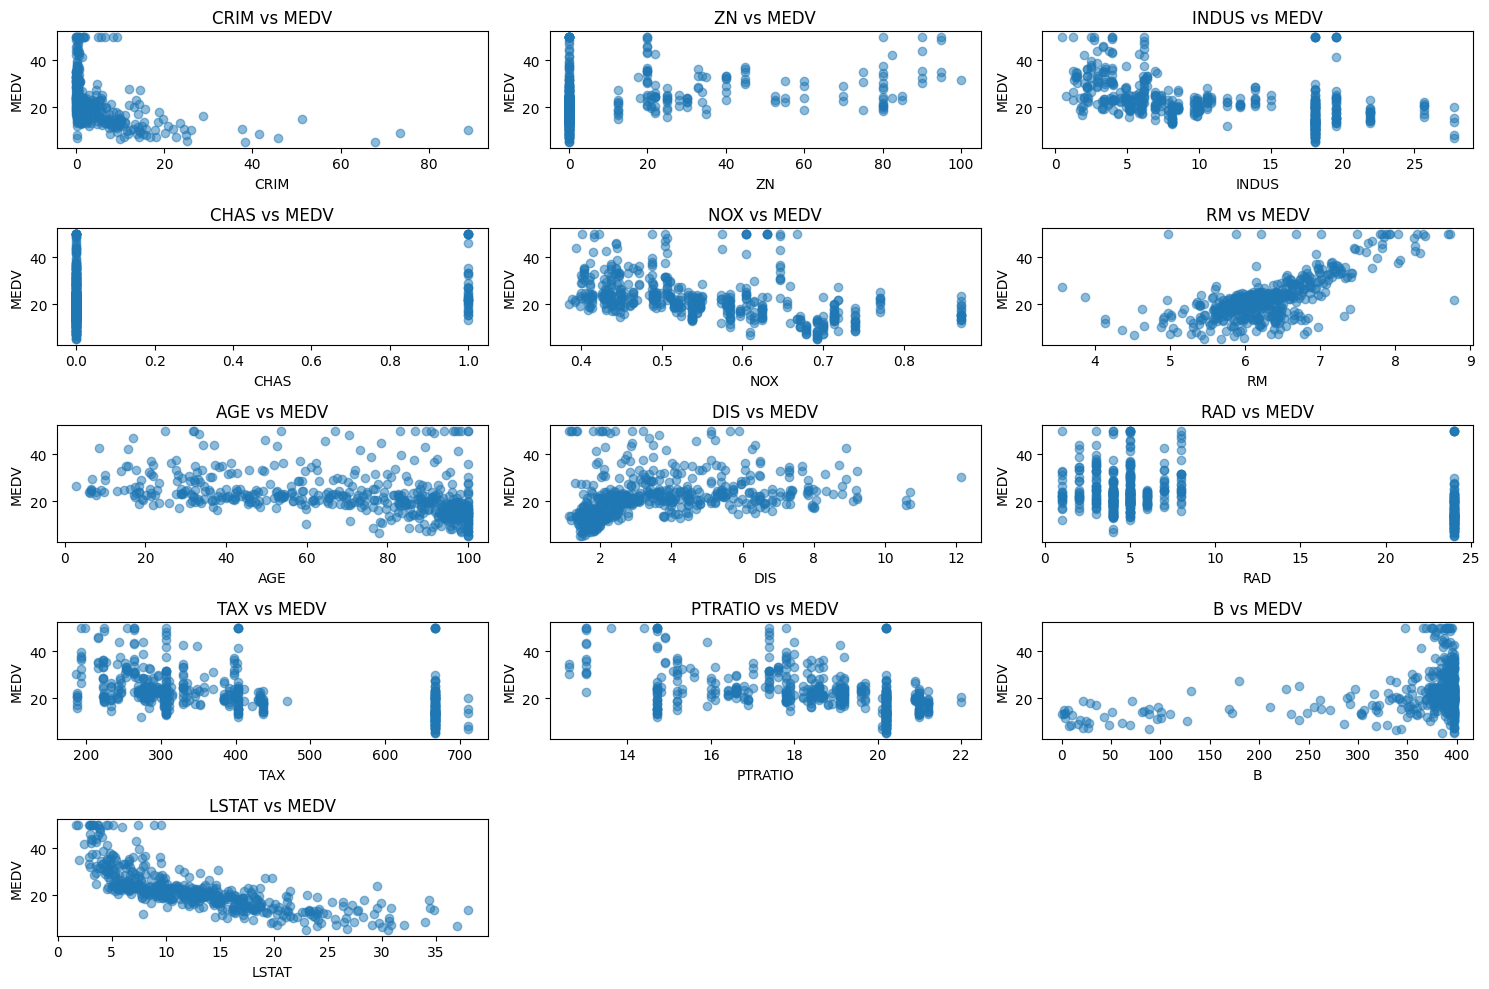

In [ ]:
plt.figure(figsize=(15, 10))
k = 1
cols = 3
rows = 5
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(rows, cols, k)
    plt.scatter(df[column], df['MEDV'], alpha=0.5)
    plt.title(f"{column} vs MEDV")
    plt.xlabel(column)
    plt.ylabel('MEDV')
    k += 1
plt.tight_layout()
plt.show()

Gambar ini menunjukkan scatter plot yang menggambarkan hubungan antara setiap fitur dalam dataset dan harga rumah (MEDV). Setiap plot menunjukkan bagaimana satu fitur berhubungan dengan harga rumah. Misalnya, plot CRIM vs MEDV menunjukkan bahwa semakin tinggi tingkat kriminalitas, semakin rendah harga rumah. Sedangkan plot RM vs MEDV menunjukkan bahwa semakin banyak kamar di rumah, semakin tinggi harga rumah. Scatter plot ini membantu kita memahami fitur mana yang memiliki hubungan kuat dengan harga rumah, sehingga bisa digunakan untuk model prediksi.

## Data Scaling  

In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler menstandarisasi fitur dengan mean 0 dan varians 1.
print("Sebelum data scaling")
display(df.head())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['MEDV']))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']
print("Sesudah data scaling")
display(scaled_df.head())

X = scaled_df.drop(columns=["MEDV"]).values
y = scaled_df["MEDV"].values

Sebelum data scaling


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Sesudah data scaling


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


Gambar ini menunjukkan proses data scaling yang digunakan untuk menormalkan data. Sebelum scaling, nilai-nilai pada fitur seperti CRIM, ZN, dan AGE memiliki rentang yang sangat berbeda, yang bisa mempengaruhi kinerja model. Dengan menggunakan StandardScaler, data diubah sehingga setiap fitur memiliki rata-rata 0 dan standar deviasi 1, sehingga lebih seragam dan lebih mudah diproses oleh model pembelajaran mesin.

Setelah scaling, data menjadi lebih konsisten, dan fitur dengan skala besar tidak akan mendominasi model. Kolom target MEDV (harga rumah) dipisahkan dan tidak diubah dalam proses ini. Hasil akhirnya adalah data yang siap digunakan untuk pelatihan model dengan skala yang lebih adil untuk setiap fitur.

## Split Data (80% train, 20% test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Training")
display("X Training", X_train[:5])
display("Y Training",y_train[:5])
print("Data Testing")
display("X Testing", X_test[:5])
display("Y Testing",y_test[:5])

Data Training


'X Training'

array([[ 1.32780421e+00, -4.87722365e-01,  1.01599907e+00,
        -2.72598567e-01,  5.12295652e-01, -1.39706929e+00,
         1.02148094e+00, -8.05438224e-01,  1.66124525e+00,
         1.53092646e+00,  8.06575835e-01, -7.88779407e-02,
         1.71810120e+00],
       [-3.47506015e-01, -4.87722365e-01, -4.37258013e-01,
        -2.72598567e-01, -1.44217433e-01, -6.42000190e-01,
        -4.29390392e-01,  3.34449434e-01, -6.37961799e-01,
        -6.01276097e-01,  1.17646583e+00,  4.27017554e-01,
        -5.86355801e-01],
       [-4.16483921e-01,  1.01446252e+00, -7.40749452e-01,
        -2.72598567e-01, -1.00891427e+00, -3.61342430e-01,
        -1.61000138e+00,  1.35273767e+00, -9.82842857e-01,
        -6.19093946e-01, -7.19220392e-01,  6.11369155e-02,
        -6.76067022e-01],
       [ 3.99962749e-01, -4.87722365e-01,  1.01599907e+00,
        -2.72598567e-01,  5.12295652e-01, -2.58767006e-01,
         5.87641964e-01, -8.42944849e-01,  1.66124525e+00,
         1.53092646e+00,  8.06575835e

'Y Training'

array([12. , 19.9, 19.4, 13.4, 18.2])

Data Testing


'X Testing'

array([[-0.40983668, -0.48772236, -1.03402724, -0.27259857, -0.38609067,
         0.18715116,  0.55208139, -0.54607682, -0.52300145, -0.66660821,
        -0.85792914,  0.42570183, -0.50645674],
       [-0.41394931,  1.22906036, -0.68968118,  3.66839786, -0.93030547,
         0.67438443, -1.26861989,  0.13431903, -0.6379618 , -0.91605809,
        -0.39556665,  0.44105193, -1.27881429],
       [-0.40821211, -0.48772236,  2.42256516, -0.27259857,  0.469104  ,
        -0.42972605,  1.0748218 , -0.91600909, -0.6379618 ,  1.79819419,
         0.76033959,  0.36660394,  0.75931252],
       [-0.40985297, -0.48772236, -0.04768006, -0.27259857, -1.22400869,
        -0.31290404, -2.16119024,  0.70937307, -0.6379618 , -0.61315466,
         0.34421334,  0.37537543, -0.99986846],
       [ 0.17184212, -0.48772236,  1.01599907, -0.27259857,  1.36749033,
         0.01761678,  0.8258978 , -0.67827698,  1.66124525,  1.53092646,
         0.80657583,  0.31156286,  0.64717349]])

'Y Testing'

array([23.6, 32.4, 13.6, 22.8, 16.1])

# B. Pembangunan Model Baseline
Membangun model baseline dengan mendefinisikan parameter dasar dari model yang dikembangkan.

## B.1. Model Baseline Decision Tree

Pohon Keputusan adalah model pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Model ini membagi data ke dalam subset yang lebih kecil berdasarkan kondisi atau aturan tertentu yang mengoptimalkan pemisahan kelas atau nilai target.

## Hanya Grid Search dan Tidak Melakukan Cross Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y, sample_weight=None):
        if sample_weight is None:
            sample_weight = np.ones(len(y))
        self.tree = self._build_tree(X, y, sample_weight, depth=0)

    def _build_tree(self, X, y, sample_weight, depth):
        n_samples, n_features = X.shape
        # Kondisi berhenti 1: Kedalaman maksimum tercapai
        if self.max_depth is not None and depth >= self.max_depth:
            return np.average(y, weights=sample_weight)

        # Kondisi berhenti 2: Sampel terlalu sedikit
        if n_samples < self.min_samples_split or len(y) < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)
        # Cari split terbaik
        best_split = self._best_split(X, y, sample_weight)
        if best_split is None:
            return np.average(y, weights=sample_weight)

        # Bagi data berdasarkan split terbaik
        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices

        # Validasi: Pastikan kedua sisi punya cukup sampel
        if left_indices.sum() < self.min_samples_leaf or right_indices.sum() < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)
        # # Rekursi: Bangun sub-pohon kiri dan kanan
        left_tree = self._build_tree(X[left_indices], y[left_indices], sample_weight[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], sample_weight[right_indices], depth + 1)

        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y, sample_weight):
        best_split = None
        best_score = float('inf')
        n_features_total = X.shape[1]

        # Tentukan fitur yang akan dipertimbangkan
        features = np.arange(n_features_total)
        if self.max_features is not None:
            features = np.random.choice(n_features_total, self.max_features, replace=False)
        # Coba setiap fitur
        for feature in features:
            values = np.unique(X[:, feature])
            for val in values:
                left = X[:, feature] <= val
                right = ~left
                # Skip jika salah satu sisi terlalu sedikit sampel
                if left.sum() < self.min_samples_leaf or right.sum() < self.min_samples_leaf:
                    continue
                # Hitung variance (keberagaman) setiap sisi
                left_weight = sample_weight[left]
                right_weight = sample_weight[right]

                left_var = np.average((y[left] - np.average(y[left], weights=left_weight))**2, weights=left_weight)
                right_var = np.average((y[right] - np.average(y[right], weights=right_weight))**2, weights=right_weight)
                # Hitung weighted variance total
                weighted_variance = (
                    left_var * np.sum(left_weight) + right_var * np.sum(right_weight)
                ) / np.sum(sample_weight)
                # Simpan jika ini split terbaik sejauh ini
                if weighted_variance < best_score:
                    best_score = weighted_variance
                    best_split = {'feature': feature, 'value': val}

        return best_split

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['value']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree


# Train  model Decision Tree terhadap  data training
baseline_model = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=None)
baseline_model.fit(X_train, y_train)
# Evaluasikan  model terhadap  data testing
predictions_baseline_test = baseline_model.predict(X_test)
# Hitung  skor R² terhadap  data testing
score_baseline_test = r2_score(y_test, predictions_baseline_test)

# Evaluasikan model terhadap data  training
predictions_baseline_train = baseline_model.predict(X_train)
# Hitung skor R²  terhadap data training
score_baseline_train = r2_score(y_train, predictions_baseline_train)
# Tampilkan skor R²
print(f"R2 Score Baseline (Test): {score_baseline_test:.4f}")
print(f"R2 Score Baseline (Train): {score_baseline_train:.4f}")




R2 Score Baseline (Test): 0.8160
R2 Score Baseline (Train): 0.8170


Model memberikan performansi yang serupa pada data pelatihan dan pengujian, yang menunjukkan bahwa model  **tidak overfitting** (yaitu tidak terlalu menyesuaikan diri dengan data pelatihan dan memberikan hasil yang buruk pada data uji).

## Grid Search dan Melakukan Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# Inisialisasi KFold Cross Validator
k = 5  # Jumlah fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Simpan skor di setiap fold
train_scores = []
test_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Buat model baru untuk setiap fold
    model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None)
    model.fit(X_train_fold, y_train_fold)

    # Evaluasi pada data training
    y_train_pred = model.predict(X_train_fold)
    r2_train = r2_score(y_train_fold, y_train_pred)
    train_scores.append(r2_train)

    # Evaluasi pada data testing
    y_test_pred = model.predict(X_test_fold)
    r2_test = r2_score(y_test_fold, y_test_pred)
    test_scores.append(r2_test)

# Tampilkan hasil rata-rata dan skor per fold
for i in range(k):
    print(f"Fold {i+1}: R2 Train = {train_scores[i]:.4f}, R2 Test = {test_scores[i]:.4f}")

print(f"\nAverage R2 Score (Train): {np.mean(train_scores):.4f}")
print(f"Average R2 Score (Test): {np.mean(test_scores):.4f}")


Fold 1: R2 Train = 0.9185, R2 Test = 0.8044
Fold 2: R2 Train = 0.9296, R2 Test = 0.7797
Fold 3: R2 Train = 0.9270, R2 Test = 0.7228
Fold 4: R2 Train = 0.9259, R2 Test = 0.8034
Fold 5: R2 Train = 0.9158, R2 Test = 0.6664

Average R2 Score (Train): 0.9234
Average R2 Score (Test): 0.7553


- R² Train menunjukkan bagaimana model bekerja pada data latih, dan R² Test menunjukkan kinerja model pada data uji (data yang tidak terlihat sebelumnya).

- Rata-rata R² Test yang lebih rendah dibandingkan dengan R² Train bisa menunjukkan bahwa meskipun model baik pada data latih, performa model pada data uji sedikit lebih rendah, yang mungkin menandakan adanya **sedikit overfitting.**

## B.2. Model Baseline Random Frest  

Random Forest adalah algoritma pembelajaran ansambel yang membangun banyak pohon keputusan dan menggabungkan hasil dari semua pohon untuk memberikan prediksi yang lebih akurat. Random Forest menggunakan teknik bagging (Bootstrap Aggregating), di mana setiap pohon dilatih dengan subset acak dari data pelatihan.

## Hanya Grid Search dan Tidak Menggunakan Cross Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=6, min_samples_split=15, min_samples_leaf=1, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            if self.max_features is not None:
                tree.max_features = self.max_features
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)



# 3. Train Random Forest baseline
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)

# 4. Evaluate baseline performance
predictions_test = rf.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
predictions_train = rf.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

print(f"Random Forest Baseline R2 Score (Test): {r2_test:.4f}")
print(f"Random Forest Baseline R2 Score (Train): {r2_train:.4f}")


Random Forest Baseline R2 Score (Test): 0.8280
Random Forest Baseline R2 Score (Train): 0.9173


- Skor R² untuk data uji lebih rendah dibandingkan data pelatihan, yang mengindikasikan bahwa model cukup baik pada data latih, tetapi mungkin ada sedikit penurunan performa pada data uji.

- Perbedaan kecil antara skor R² pada data latih dan uji menunjukkan bahwa model **tidak mengalami overfitting**, karena perbedaannya tidak terlalu besar.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# # 1. Data Scaling (sama seperti sebelumnya)
# scaler = StandardScaler()
# scaled_features = df.drop(columns=['MEDV'])
# scaled_features = scaler.fit_transform(scaled_features)
# scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
# scaled_df['MEDV'] = df['MEDV']

# X = scaled_df.drop(columns=["MEDV"]).values
# y = scaled_df["MEDV"].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Random Forest baseline model
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=6, min_samples_split=15, min_samples_leaf=1, max_features=9):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            if self.max_features is not None:
                tree.max_features = self.max_features
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)



# 3. Train Random Forest baseline
rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)

# 4. Evaluate baseline performance
predictions_test = rf.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
predictions_train = rf.predict(X_train)
r2_train = r2_score(y_train, predictions_train)

print(f"Random Forest Baseline R2 Score (Test): {r2_test:.4f}")
print(f"Random Forest Baseline R2 Score (Train): {r2_train:.4f}")


Random Forest Baseline R2 Score (Test): 0.8053
Random Forest Baseline R2 Score (Train): 0.9148


Perbedaan antara skor R² pada data latih dan uji sedikit lebih besar dibandingkan dengan yang pertama, yang mungkin mengindikasikan bahwa model **sedikit mengalami overfitting**. Meskipun perbedaan tidak besar, hal ini tetap menunjukkan bahwa model memiliki kecenderungan untuk lebih baik pada data latih.

## Grid Search dan Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# Inisialisasi KFold Cross Validator
k = 5  # Jumlah fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Simpan skor di setiap fold
train_scores_rf = []
test_scores_rf = []

# Loop untuk setiap fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Buat model Random Forest untuk setiap fold
    model_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=15, min_samples_leaf=1, max_features=9)
    model_rf.fit(X_train_fold, y_train_fold)

    # Evaluasi pada data training
    y_train_pred = model_rf.predict(X_train_fold)
    r2_train = r2_score(y_train_fold, y_train_pred)
    train_scores_rf.append(r2_train)

    # Evaluasi pada data testing
    y_test_pred = model_rf.predict(X_test_fold)
    r2_test = r2_score(y_test_fold, y_test_pred)
    test_scores_rf.append(r2_test)

    print(f"Fold {fold}: R2 Train = {r2_train:.4f}, R2 Test = {r2_test:.4f}")

# Rata-rata R2 Score
print(f"\nAverage R2 Score (Train): {np.mean(train_scores_rf):.4f}")
print(f"Average R2 Score (Test): {np.mean(test_scores_rf):.4f}")


Fold 1: R2 Train = 0.9182, R2 Test = 0.8297
Fold 2: R2 Train = 0.9187, R2 Test = 0.8026
Fold 3: R2 Train = 0.9208, R2 Test = 0.7965
Fold 4: R2 Train = 0.9194, R2 Test = 0.8870
Fold 5: R2 Train = 0.9221, R2 Test = 0.7818

Average R2 Score (Train): 0.9199
Average R2 Score (Test): 0.8195


R² Test yang lebih rendah dibandingkan R² Train menandakan **sedikit overfitting**, tetapi hasil yang masih cukup baik menunjukkan bahwa model dapat menggeneralisasi dengan cukup baik.



In [ ]:
from sklearn.model_selection import KFold

# Inisialisasi KFold Cross Validator
k = 5  # Jumlah fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Simpan skor di setiap fold
train_scores_rf = []
test_scores_rf = []

# Loop untuk setiap fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Buat model Random Forest untuk setiap fold
    model_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_split=15, min_samples_leaf=1, max_features=None)
    model_rf.fit(X_train_fold, y_train_fold)

    # Evaluasi pada data training
    y_train_pred = model_rf.predict(X_train_fold)
    r2_train = r2_score(y_train_fold, y_train_pred)
    train_scores_rf.append(r2_train)

    # Evaluasi pada data testing
    y_test_pred = model_rf.predict(X_test_fold)
    r2_test = r2_score(y_test_fold, y_test_pred)
    test_scores_rf.append(r2_test)

    print(f"Fold {fold}: R2 Train = {r2_train:.4f}, R2 Test = {r2_test:.4f}")

# Rata-rata R2 Score
print(f"\nAverage R2 Score (Train): {np.mean(train_scores_rf):.4f}")
print(f"Average R2 Score (Test): {np.mean(test_scores_rf):.4f}")


Fold 1: R2 Train = 0.9166, R2 Test = 0.8172
Fold 2: R2 Train = 0.9262, R2 Test = 0.7999
Fold 3: R2 Train = 0.9260, R2 Test = 0.7955
Fold 4: R2 Train = 0.9250, R2 Test = 0.8794
Fold 5: R2 Train = 0.9170, R2 Test = 0.8271

Average R2 Score (Train): 0.9222
Average R2 Score (Test): 0.8238


R² Test yang lebih rendah dibandingkan R² Train menandakan **sedikit overfitting**, tetapi hasil yang masih cukup baik menunjukkan bahwa model dapat menggeneralisasi dengan cukup baik.


## B.3. Model Baseline  AdaBoost

AdaBoost (Adaptive Boosting) adalah algoritma pembelajaran ansambel yang menggabungkan banyak model pembelajaran lemah (misalnya, pohon keputusan kecil) untuk menghasilkan model yang kuat. Setiap model dalam ansambel dilatih secara berurutan, di mana model-model baru lebih fokus pada kesalahan model sebelumnya.

## Hanya Grid Search dan Tidak Melakukan Cross Validation


In [ ]:
import numpy as np
# from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# # ======================
# # 1. Load Dataset
# # ======================
# # Ganti path jika perlu
# df = pd.read_csv('/mnt/data/housing.csv')

# # Pisahkan X dan y
# X = df.drop('median_house_value', axis=1)
# y = df['median_house_value']

# # Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data 80% train - 20% test
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ======================
# 2. AdaBoostR2 Baseline Terbaik
# ======================
class AdaBoostR2:
    def __init__(self, n_estimators=50, learning_rate=1.0, weak_learner_params=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []
        self.weak_learner_params = weak_learner_params or {}

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        epsilon = 1e-10
        max_error = np.max(np.abs(y - np.mean(y))) + epsilon

        for m in range(self.n_estimators):
            model = DecisionTreeRegressor(**self.weak_learner_params)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)
            error = np.abs(y - y_pred)
            weighted_error = np.sum(sample_weights * error) / (np.sum(sample_weights) * max_error)

            if weighted_error >= 0.499:
                print(f"Estimator {m+1} berhenti karena weighted_error terlalu besar: {weighted_error:.4f}")
                break

            beta = weighted_error / (1 - weighted_error + epsilon)
            model_weight = self.learning_rate * np.log(1 / (beta + epsilon))

            sample_weights *= np.power(beta, (1 - error / max_error))

            self.models.append(model)
            self.model_weights.append(model_weight)

        total_weight = np.sum(self.model_weights) + epsilon
        self.model_weights = [w / total_weight for w in self.model_weights]

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, weight in zip(self.models, self.model_weights):
            predictions += weight * model.predict(X)
        return predictions

# ======================
# 3. Hyperparameter Terbaik untuk DecisionTree
# ======================
best_params = {
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 2
}

# ======================
# 4. Training dan Evaluasi
# ======================
adaboost_model = AdaBoostR2(
    n_estimators=50,
    learning_rate=1.0,
    weak_learner_params=best_params
)

adaboost_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_test = adaboost_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("\n✅ AdaBoost R2 Score (Test Set):", r2_test)

y_pred_train = adaboost_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("✅ AdaBoost R2 Score (Train Set):", r2_train)



✅ AdaBoost R2 Score (Test Set): 0.9036664874126823
✅ AdaBoost R2 Score (Train Set): 0.9549978617821709


Model AdaBoost tanpa Cross Validation memberikan hasil yang sangat baik pada data latih dan data uji, dengan R² Test = 0.9037 dan R² Train = 0.9549, yang menunjukkan bahwa model cukup baik dalam memprediksi kedua dataset.

## Grid Search dan Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Konfigurasi K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_scores_ada = []
test_scores_ada = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model_ada = AdaBoostR2(
        n_estimators=50,
        learning_rate=1.0,
        weak_learner_params=best_params
    )
    model_ada.fit(X_train_fold, y_train_fold)

    y_train_pred = model_ada.predict(X_train_fold)
    r2_train = r2_score(y_train_fold, y_train_pred)
    train_scores_ada.append(r2_train)

    y_test_pred = model_ada.predict(X_test_fold)
    r2_test = r2_score(y_test_fold, y_test_pred)
    test_scores_ada.append(r2_test)

    print(f"Fold {fold}: R2 Train = {r2_train:.4f}, R2 Test = {r2_test:.4f}")

print(f"\nAverage R2 Score (Train): {np.mean(train_scores_ada):.4f}")
print(f"Average R2 Score (Test): {np.mean(test_scores_ada):.4f}")


Fold 1: R2 Train = 0.9550, R2 Test = 0.9037
Fold 2: R2 Train = 0.9586, R2 Test = 0.8184
Fold 3: R2 Train = 0.9540, R2 Test = 0.8601
Fold 4: R2 Train = 0.9530, R2 Test = 0.8816
Fold 5: R2 Train = 0.9580, R2 Test = 0.8471

Average R2 Score (Train): 0.9557
Average R2 Score (Test): 0.8622


- Hasilnya menunjukkan bahwa model memberikan performa yang stabil, namun perbedaan R² antara fold dapat terjadi karena variasi dalam data.

- Artinya, rata-rata model mampu menjelaskan 95.57% dari variansi pada data pelatihan, dan 86.22% pada data uji. Ini menunjukkan bahwa model dapat menggeneralisasi dengan baik pada data yang belum dilihat.

# C.  Eksplorasi Model:
Melakukan eksplorasi model dengan membangun minimal 3 skema model melalui proses hyperparameter tuning atau pemilihan kombinasi parameter yang bervariasi.

=== Final Model Evaluation ===
Best Hyperparameters     : {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6}
Train R2 Score (Full Set): 0.9889
Test R2 Score (Full Set) : 0.7454
Train RMSE               : 0.9812
Test RMSE                : 4.3210
Avg R2 Score (Train/Fold): 0.9899
Avg R2 Score (Test/Fold) : 0.6696
Avg RMSE (Train/Fold)    : 0.9238
Avg RMSE (Test/Fold)     : 4.9651


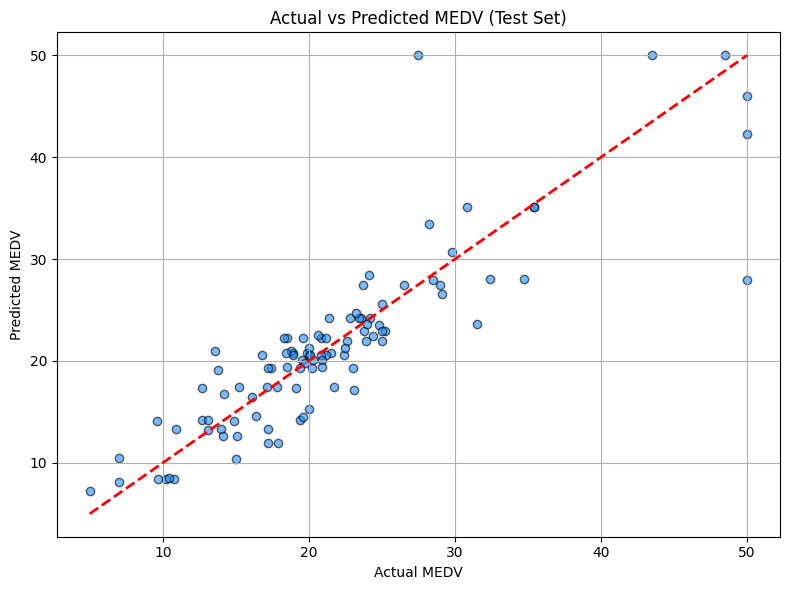

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load & Preprocessing
# df = pd.read_csv('/mnt/data/housing.csv')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['MEDV']))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']

# 2. Feature Selection & Splitting
selected_features = ['CRIM', 'RM', 'DIS', 'LSTAT', 'ZN', 'NOX', 'CHAS', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
X = scaled_df[selected_features].values
y = scaled_df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning
param_grid = {
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None, 2, 3, 4, 5, 6, 7]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                model = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features=max_features
                )
                scores = []
                for train_idx, val_idx in kf.split(X_train):
                    X_tr, X_val = X_train[train_idx], X_train[val_idx]
                    y_tr, y_val = y_train[train_idx], y_train[val_idx]
                    model.fit(X_tr, y_tr)
                    preds = model.predict(X_val)
                    scores.append(r2_score(y_val, preds))
                avg_score = np.mean(scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }

# 4. Train Final Model
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# 5. Final Prediction (Train/Test)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. K-Fold Manual Evaluation (Avg R2 + RMSE)
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = DecisionTreeRegressor(**best_params)
    model.fit(X_tr, y_tr)

    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)

    train_r2_scores.append(r2_score(y_tr, y_tr_pred))
    test_r2_scores.append(r2_score(y_val, y_val_pred))
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

avg_train_r2 = np.mean(train_r2_scores)
avg_test_r2 = np.mean(test_r2_scores)
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

# 7. Output Hasil
print("=== Final Model Evaluation ===")
print(f"Best Hyperparameters     : {best_params}")
print(f"Train R2 Score (Full Set): {train_r2:.4f}")
print(f"Test R2 Score (Full Set) : {test_r2:.4f}")
print(f"Train RMSE               : {train_rmse:.4f}")
print(f"Test RMSE                : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold): {avg_train_r2:.4f}")
print(f"Avg R2 Score (Test/Fold) : {avg_test_r2:.4f}")
print(f"Avg RMSE (Train/Fold)    : {avg_train_rmse:.4f}")
print(f"Avg RMSE (Test/Fold)     : {avg_test_rmse:.4f}")

# 8. Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


=== Final Model Evaluation ===
Best Hyperparameters     : {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 3}
Train R2 Score (Full Set): 0.9412
Test R2 Score (Full Set) : 0.8087
Train RMSE               : 2.2603
Test RMSE                : 3.7450
Avg R2 Score (Train/Fold): 0.9259
Avg R2 Score (Test/Fold) : 0.6502
Avg RMSE (Train/Fold)    : 2.5124
Avg RMSE (Test/Fold)     : 5.2134


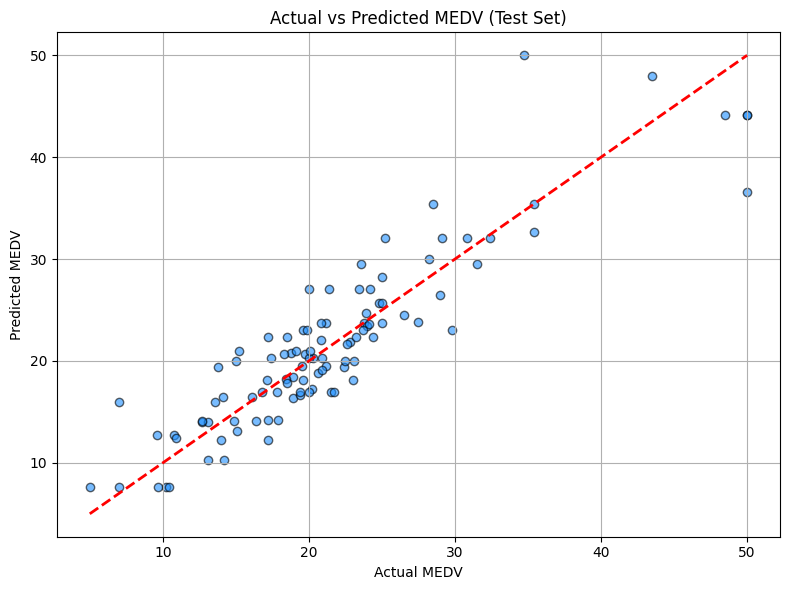

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load & Preprocessing
# df = pd.read_csv('/mnt/data/housing.csv')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['MEDV']))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']

# 2. Feature Selection & Splitting
selected_features = ['CRIM', 'RM', 'DIS', 'LSTAT', 'ZN', 'NOX', 'CHAS', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
X = scaled_df[selected_features].values
y = scaled_df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning
param_grid = {
    'max_depth': [10, 12, 14],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 2, 3, 4]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                model = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features=max_features
                )
                scores = []
                for train_idx, val_idx in kf.split(X_train):
                    X_tr, X_val = X_train[train_idx], X_train[val_idx]
                    y_tr, y_val = y_train[train_idx], y_train[val_idx]
                    model.fit(X_tr, y_tr)
                    preds = model.predict(X_val)
                    scores.append(r2_score(y_val, preds))
                avg_score = np.mean(scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }

# 4. Train Final Model
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# 5. Final Prediction (Train/Test)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. K-Fold Manual Evaluation (Avg R2 + RMSE)
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = DecisionTreeRegressor(**best_params)
    model.fit(X_tr, y_tr)

    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)

    train_r2_scores.append(r2_score(y_tr, y_tr_pred))
    test_r2_scores.append(r2_score(y_val, y_val_pred))
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

avg_train_r2 = np.mean(train_r2_scores)
avg_test_r2 = np.mean(test_r2_scores)
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

# 7. Output Hasil
print("=== Final Model Evaluation ===")
print(f"Best Hyperparameters     : {best_params}")
print(f"Train R2 Score (Full Set): {train_r2:.4f}")
print(f"Test R2 Score (Full Set) : {test_r2:.4f}")
print(f"Train RMSE               : {train_rmse:.4f}")
print(f"Test RMSE                : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold): {avg_train_r2:.4f}")
print(f"Avg R2 Score (Test/Fold) : {avg_test_r2:.4f}")
print(f"Avg RMSE (Train/Fold)    : {avg_train_rmse:.4f}")
print(f"Avg RMSE (Test/Fold)     : {avg_test_rmse:.4f}")

# 8. Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


## C.1. Decision Tree Hyperparamater Tuning

=== Final Model Evaluation ===
Best Hyperparameters     : {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 5}
Train R2 Score (Full Set): 0.9093
Test R2 Score (Full Set) : 0.7313
Train RMSE               : 2.8072
Test RMSE                : 4.4389
Avg R2 Score (Train/Fold): 0.9256
Avg R2 Score (Test/Fold) : 0.6725


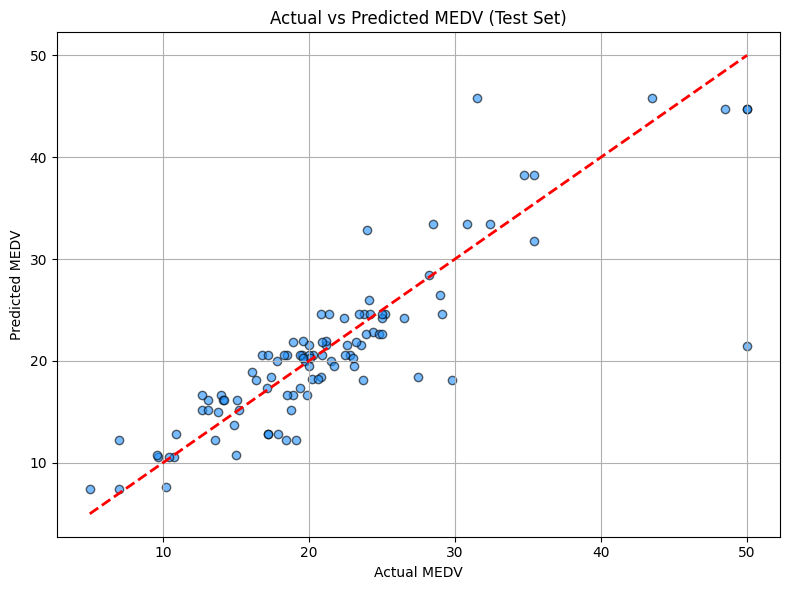

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load & Preprocessing
# # df = pd.read_csv('/mnt/data/housing.csv')
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df.drop(columns=['MEDV']))
# scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
# scaled_df['MEDV'] = df['MEDV']

# # 2. Feature Selection & Splitting
# selected_features = ['CRIM', 'RM', 'DIS', 'LSTAT', 'ZN', 'NOX', 'CHAS', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
# X = scaled_df[selected_features].values
# y = scaled_df['MEDV'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning (Grid Search on TRAIN set)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 2, 3, 4, 5]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                model = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features=max_features
                )
                scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
                avg_score = np.mean(scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }

# 4. Final Model with Best Params (train on full training set)
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# 5. Evaluation on Full Train/Test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. Manual K-Fold Eval (Train & Test Scores)
train_scores = []
test_scores = []

for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]

    best_model.fit(X_tr, y_tr)
    train_scores.append(r2_score(y_tr, best_model.predict(X_tr)))
    test_scores.append(r2_score(y_val, best_model.predict(X_val)))

avg_train_r2 = np.mean(train_scores)
avg_test_r2 = np.mean(test_scores)

# 7. Print Results
print("=== Final Model Evaluation ===")
print(f"Best Hyperparameters     : {best_params}")
print(f"Train R2 Score (Full Set): {train_r2:.4f}")
print(f"Test R2 Score (Full Set) : {test_r2:.4f}")
print(f"Train RMSE               : {train_rmse:.4f}")
print(f"Test RMSE                : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold): {avg_train_r2:.4f}")
print(f"Avg R2 Score (Test/Fold) : {avg_test_r2:.4f}")

# 8. Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Best Model of Decision Tree

=== Final Model Evaluation ===
Best Hyperparameters     : {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5}
Train R2 Score (Full Set): 0.9566
Test R2 Score (Full Set) : 0.8950
Train RMSE               : 1.9424
Test RMSE                : 2.7750
Avg R2 Score (Train/Fold): 0.9529
Avg R2 Score (Test/Fold) : 0.6379


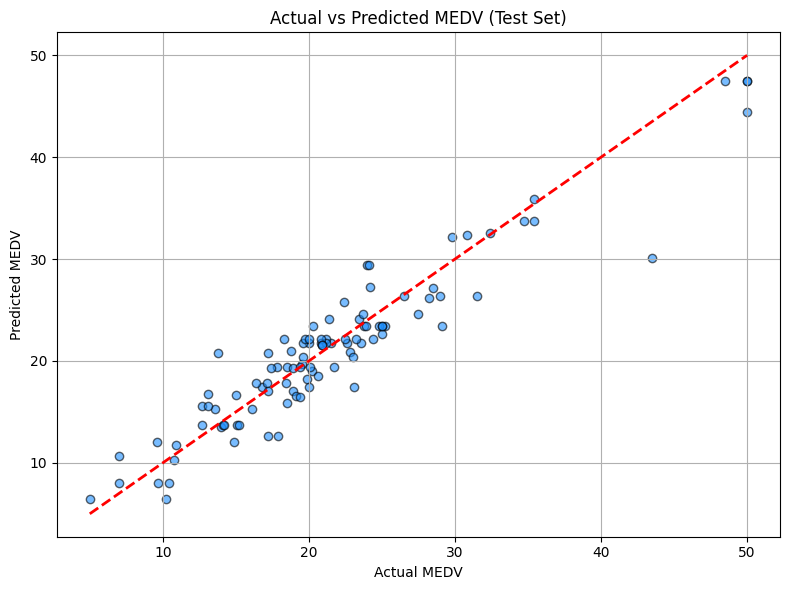

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# # 1. Load & Preprocessing
# # df = pd.read_csv('/mnt/data/housing.csv')
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df.drop(columns=['MEDV']))
# scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
# scaled_df['MEDV'] = df['MEDV']

# # 2. Feature Selection & Splitting
# selected_features = ['CRIM', 'RM', 'DIS', 'LSTAT', 'ZN', 'NOX', 'CHAS', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B']
# X = scaled_df[selected_features].values
# y = scaled_df['MEDV'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hyperparameter Tuning (Grid Search on TRAIN set)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 2, 3, 4, 5]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                model = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features=max_features
                )
                scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
                avg_score = np.mean(scores)
                if avg_score > best_score:
                    best_score = avg_score
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }

# 4. Final Model with Best Params (train on full training set)
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# 5. Evaluation on Full Train/Test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. Manual K-Fold Eval (Train & Test Scores)
train_scores = []
test_scores = []

for train_index, test_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]

    best_model.fit(X_tr, y_tr)
    train_scores.append(r2_score(y_tr, best_model.predict(X_tr)))
    test_scores.append(r2_score(y_val, best_model.predict(X_val)))

avg_train_r2 = np.mean(train_scores)
avg_test_r2 = np.mean(test_scores)

# 7. Print Results
print("=== Final Model Evaluation ===")
print(f"Best Hyperparameters     : {best_params}")
print(f"Train R2 Score (Full Set): {train_r2:.4f}")
print(f"Test R2 Score (Full Set) : {test_r2:.4f}")
print(f"Train RMSE               : {train_rmse:.4f}")
print(f"Test RMSE                : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold): {avg_train_r2:.4f}")
print(f"Avg R2 Score (Test/Fold) : {avg_test_r2:.4f}")

# 8. Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


=== Final Model Evaluation ===
Best Parameters         : {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5}
Train R2 Score (Full Set): 0.9595
Test R2 Score (Full Set) : 0.8434
Train RMSE               : 1.8763
Test RMSE                : 3.3893
Avg R2 Score (Train/Fold): 0.9459
Avg R2 Score (Test/Fold) : 0.6236
Avg RMSE (Train/Fold)    : 2.1549
Avg RMSE (Test/Fold)     : 5.4377


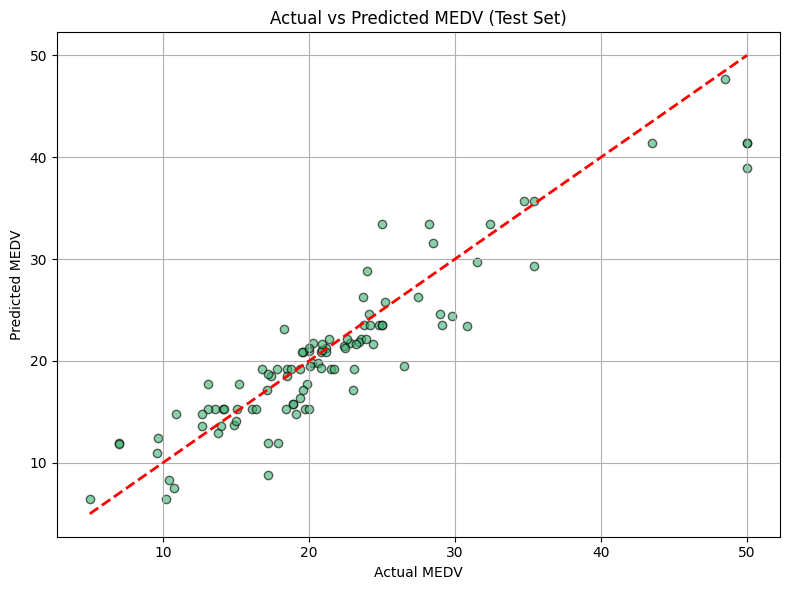

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# --- 1. Parameter terbaik dari hasil tuning sebelumnya ---
best_params = {
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 5
}

# --- 2. Bangun model dan latih di data training ---
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# --- 3. Evaluasi di full train/test set ---
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 4. Cross-validation ulang untuk validasi konsistensi ---
kf = KFold(n_splits=10, shuffle=True, random_state=42)

train_r2_scores, test_r2_scores = [], []
train_rmse_scores, test_rmse_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = DecisionTreeRegressor(**best_params)
    model.fit(X_tr, y_tr)

    y_tr_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_val)

    train_r2_scores.append(r2_score(y_tr, y_tr_pred))
    test_r2_scores.append(r2_score(y_val, y_val_pred))

    train_rmse_scores.append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

avg_train_r2 = np.mean(train_r2_scores)
avg_test_r2 = np.mean(test_r2_scores)
avg_train_rmse = np.mean(train_rmse_scores)
avg_test_rmse = np.mean(test_rmse_scores)

# --- 5. Output hasil evaluasi ---
print("=== Final Model Evaluation ===")
print(f"Best Parameters         : {best_params}")
print(f"Train R2 Score (Full Set): {train_r2:.4f}")
print(f"Test R2 Score (Full Set) : {test_r2:.4f}")
print(f"Train RMSE               : {train_rmse:.4f}")
print(f"Test RMSE                : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold): {avg_train_r2:.4f}")
print(f"Avg R2 Score (Test/Fold) : {avg_test_r2:.4f}")
print(f"Avg RMSE (Train/Fold)    : {avg_train_rmse:.4f}")
print(f"Avg RMSE (Test/Fold)     : {avg_test_rmse:.4f}")

# --- 6. Visualisasi: Prediksi vs Aktual (Test Set) ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k', color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


## C.2. Random Forest Hyperparamater Tuning

## Grid Search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from itertools import product

# # 1. Data Scaling
# scaler = StandardScaler()
# scaled_features = df.drop(columns=['MEDV'])
# scaled_features = scaler.fit_transform(scaled_features)
# scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
# scaled_df['MEDV'] = df['MEDV']

# X = scaled_df.drop(columns=["MEDV"]).values
# y = scaled_df["MEDV"].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 4. Manual Grid Search untuk Random Forest
n_estimators_values = [10, 20, 50]
max_depth_values = [4, 5, 6]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]
max_features_values = [None, 3, 5]  # None berarti pakai semua fitur

best_score = -np.inf
best_params = None

print("Starting grid search for Random Forest...")

for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features in product(
        n_estimators_values, max_depth_values, min_samples_split_values, min_samples_leaf_values, max_features_values):

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    model.fit(X_train, y_train)

    predictions_test = model.predict(X_test)
    score_test = r2_score(y_test, predictions_test)
    predictions_train = model.predict(X_train)
    score_train = r2_score(y_train, predictions_train)

    print(f"n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, R2_test={score_test:.4f}, R2_train={score_train:.4f}")

    if score_test > best_score:
        best_score = score_test
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'max_features': max_features
        }
        best_train_score = score_train

print("\nBest Hyperparameters for Random Forest:", best_params)
print("Best R2 Score on Test Set:", best_score)
print("Corresponding R2 Score on Training Set:", best_train_score)


Starting grid search for Random Forest...
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features=None, R2_test=0.8456, R2_train=0.9035
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features=3, R2_test=0.7576, R2_train=0.8688
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features=5, R2_test=0.7674, R2_train=0.8971
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=2, max_features=None, R2_test=0.8320, R2_train=0.8922
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=2, max_features=3, R2_test=0.7667, R2_train=0.8744
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=2, max_features=5, R2_test=0.7939, R2_train=0.8871
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=4, max_features=None, R2_test=0.7991, R2_train=0.8877
n_estimators=10, max_depth=4, min_samples_split=2, min_samples_leaf=4, max_features=3, R2_test=0.7889, R2_train=0.86

Train R2 Score: 0.9135
Test R2 Score: 0.8551
Train MSE: 7.5123
Test MSE: 10.6277
Train MAE: 1.8706
Test MAE: 2.2187


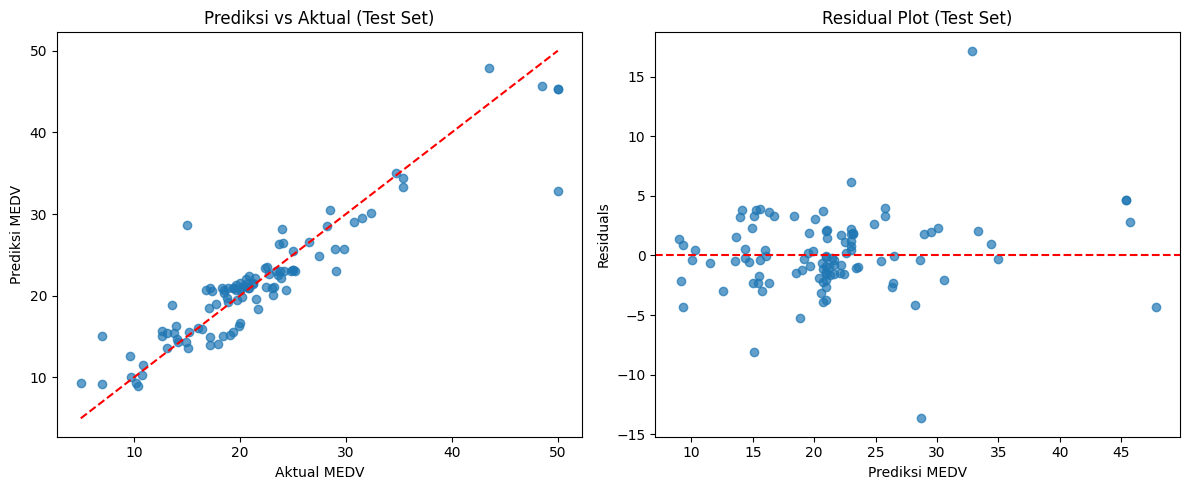

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Ambil model terbaik
best_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features']
)
best_rf.fit(X_train, y_train)

# 2. Prediksi
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# 3. Hitung metrik
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Train R2 Score: {r2_train:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")

# 4. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(12, 5))

# Scatter plot Prediksi vs Aktual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.xlabel('Aktual MEDV')
plt.ylabel('Prediksi MEDV')
plt.title('Prediksi vs Aktual (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Prediksi MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')

plt.tight_layout()
plt.show()


## Grid Search dan Cross Validation

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
# --- Decision Tree Buatan ---
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None
        self.feature_importances_ = None

    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or len(y) < self.min_samples_leaf:
            return np.mean(y)
        best_split = self._best_split(X, y)
        if best_split is None:
            return np.mean(y)
        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices
        total_var = np.var(y)
        left_var = np.var(y[left_indices])
        right_var = np.var(y[right_indices])
        weighted_var = (left_var * len(y[left_indices]) + right_var * len(y[right_indices])) / len(y)
        var_reduction = total_var - weighted_var
        self.feature_importances_[best_split['feature']] += var_reduction
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y):
        best_var_reduction = 0
        best_split = None
        n_samples, n_features = X.shape
        features = range(n_features) if self.max_features is None else np.random.choice(n_features, self.max_features, replace=False)
        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left = y[X[:, feature] <= threshold]
                right = y[X[:, feature] > threshold]
                if len(left) < self.min_samples_leaf or len(right) < self.min_samples_leaf:
                    continue
                total_var = np.var(y)
                left_var = np.var(left)
                right_var = np.var(right)
                weighted_var = (len(left) * left_var + len(right) * right_var) / len(y)
                var_reduction = total_var - weighted_var
                if var_reduction > best_var_reduction:
                    best_var_reduction = var_reduction
                    best_split = {'feature': feature, 'value': threshold}
        return best_split

    def predict_one(self, x, node):
        if not isinstance(node, dict):
            return node
        if x[node['feature']] <= node['value']:
            return self.predict_one(x, node['left'])
        else:
            return self.predict_one(x, node['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

# --- Random Forest Buatan ---
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []
        self.feature_importances_ = None

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        feature_importances_accum = np.zeros(X.shape[1])
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            feature_importances_accum += tree.feature_importances_
        self.feature_importances_ = feature_importances_accum / self.n_estimators

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

# --- Skor R2 manual ---
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# --- Cross Validation + Grid Search ---
def cross_val_score_manual(X, y, param_set, k_folds=5):
    fold_size = len(X) // k_folds
    scores = []
    for i in range(k_folds):
        start = i * fold_size
        end = start + fold_size
        X_valid = X[start:end]
        y_valid = y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        model = RandomForestRegressor(**param_set)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)
        train_r2 = r2_score(y_train, y_pred_train)
        valid_r2 = r2_score(y_valid, y_pred_valid)
        print(f"Fold {i+1} - Train R2: {train_r2:.4f}, Valid R2: {valid_r2:.4f}")
        scores.append(valid_r2)
    return np.mean(scores)

# 1. Data Scaling
scaler = StandardScaler()
scaled_features = df.drop(columns=['MEDV'])
scaled_features = scaler.fit_transform(scaled_features)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']

X = scaled_df.drop(columns=["MEDV"]).values
y = scaled_df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search
from itertools import product
param_grid = {
    'n_estimators': [10],
    'max_depth': [ 5, 6, 7],
    'min_samples_split': [5,10 ],
    'min_samples_leaf': [2,4,6],
    'max_features': [None, 3, 4]
}

best_score = -np.inf
best_params = None
keys, values = zip(*param_grid.items())
for v in product(*values):
    param_set = dict(zip(keys, v))
    print(f"\nEvaluating params: {param_set}")
    score = cross_val_score_manual(X_train, y_train, param_set, k_folds=5)
    model = RandomForestRegressor(**param_set)
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    print(f"Train R2 (Full Data): {train_r2:.4f}, Test R2: {test_r2:.4f}, Cross-Val R2: {score:.4f}")
    if score > best_score:
        best_score = score
        best_params = param_set

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Val R2:", best_score)


best_score = -np.inf
best_params = None
best_model = None

keys, values = zip(*param_grid.items())
for v in product(*values):
    param_set = dict(zip(keys, v))
    print(f"\nEvaluating params: {param_set}")
    score = cross_val_score_manual(X_train, y_train, param_set, k_folds=5)
    model = RandomForestRegressor(**param_set)
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    print(f"Train R2 (Full Data): {train_r2:.4f}, Test R2: {test_r2:.4f}, Cross-Val R2: {score:.4f}")

    if score > best_score:
        best_score = score
        best_params = param_set
        best_model = model

# --- Simpan Model Terbaik dan Param ---
random_forest_best_model = best_model
random_forest_best_params = best_params

print("\nBest Hyperparameters:", random_forest_best_params)
print("Best Cross-Val R2:", best_score)

# Tampilkan Feature Importances
print("\nFeature Importances (Best Model):")
for idx, importance in enumerate(random_forest_best_model.feature_importances_):
    print(f"Fitur {idx}: {importance:.4f}")


Evaluating params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None}
Fold 1 - Train R2: 0.9219, Valid R2: 0.8105
Fold 2 - Train R2: 0.9189, Valid R2: 0.8094
Fold 3 - Train R2: 0.9151, Valid R2: 0.8466
Fold 4 - Train R2: 0.9312, Valid R2: 0.8577
Fold 5 - Train R2: 0.9357, Valid R2: 0.8006
Train R2 (Full Data): 0.9203, Test R2: 0.8550, Cross-Val R2: 0.8250

Evaluating params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 3}
Fold 1 - Train R2: 0.8949, Valid R2: 0.7937
Fold 2 - Train R2: 0.8763, Valid R2: 0.7745
Fold 3 - Train R2: 0.8915, Valid R2: 0.7813
Fold 4 - Train R2: 0.8785, Valid R2: 0.8590
Fold 5 - Train R2: 0.9189, Valid R2: 0.7575
Train R2 (Full Data): 0.8684, Test R2: 0.7696, Cross-Val R2: 0.7932

Evaluating params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 4}
Fold 1 - Train R2: 0.9199, Valid R2: 0.7662
Fold 2 -

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
# --- Decision Tree Buatan ---
class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None
        self.feature_importances_ = None

    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or len(y) < self.min_samples_leaf:
            return np.mean(y)
        best_split = self._best_split(X, y)
        if best_split is None:
            return np.mean(y)
        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices
        total_var = np.var(y)
        left_var = np.var(y[left_indices])
        right_var = np.var(y[right_indices])
        weighted_var = (left_var * len(y[left_indices]) + right_var * len(y[right_indices])) / len(y)
        var_reduction = total_var - weighted_var
        self.feature_importances_[best_split['feature']] += var_reduction
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y):
        best_var_reduction = 0
        best_split = None
        n_samples, n_features = X.shape
        features = range(n_features) if self.max_features is None else np.random.choice(n_features, self.max_features, replace=False)
        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left = y[X[:, feature] <= threshold]
                right = y[X[:, feature] > threshold]
                if len(left) < self.min_samples_leaf or len(right) < self.min_samples_leaf:
                    continue
                total_var = np.var(y)
                left_var = np.var(left)
                right_var = np.var(right)
                weighted_var = (len(left) * left_var + len(right) * right_var) / len(y)
                var_reduction = total_var - weighted_var
                if var_reduction > best_var_reduction:
                    best_var_reduction = var_reduction
                    best_split = {'feature': feature, 'value': threshold}
        return best_split

    def predict_one(self, x, node):
        if not isinstance(node, dict):
            return node
        if x[node['feature']] <= node['value']:
            return self.predict_one(x, node['left'])
        else:
            return self.predict_one(x, node['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

# --- Random Forest Buatan ---
class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []
        self.feature_importances_ = None

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        feature_importances_accum = np.zeros(X.shape[1])
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            feature_importances_accum += tree.feature_importances_
        self.feature_importances_ = feature_importances_accum / self.n_estimators

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

# --- Skor R2 manual ---
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# --- Cross Validation + Grid Search ---
def cross_val_score_manual(X, y, param_set, k_folds=5):
    fold_size = len(X) // k_folds
    scores = []
    for i in range(k_folds):
        start = i * fold_size
        end = start + fold_size
        X_valid = X[start:end]
        y_valid = y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        model = RandomForestRegressor(**param_set)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)
        train_r2 = r2_score(y_train, y_pred_train)
        valid_r2 = r2_score(y_valid, y_pred_valid)
        print(f"Fold {i+1} - Train R2: {train_r2:.4f}, Valid R2: {valid_r2:.4f}")
        scores.append(valid_r2)
    return np.mean(scores)

# 1. Data Scaling
scaler = StandardScaler()
scaled_features = df.drop(columns=['MEDV'])
scaled_features = scaler.fit_transform(scaled_features)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']

X = scaled_df.drop(columns=["MEDV"]).values
y = scaled_df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search
from itertools import product
param_grid = {
    'n_estimators': [20],
    'max_depth': [ 5],
    'min_samples_split': [10 ],
    'min_samples_leaf': [4],
    'max_features': [None]
}

best_score = -np.inf
best_params = None
keys, values = zip(*param_grid.items())
for v in product(*values):
    param_set = dict(zip(keys, v))
    print(f"\nEvaluating params: {param_set}")
    score = cross_val_score_manual(X_train, y_train, param_set, k_folds=5)
    model = RandomForestRegressor(**param_set)
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    print(f"Train R2 (Full Data): {train_r2:.4f}, Test R2: {test_r2:.4f}, Cross-Val R2: {score:.4f}")
    if score > best_score:
        best_score = score
        best_params = param_set

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Val R2:", best_score)


best_score = -np.inf
best_params = None
best_model = None

keys, values = zip(*param_grid.items())
for v in product(*values):
    param_set = dict(zip(keys, v))
    print(f"\nEvaluating params: {param_set}")
    score = cross_val_score_manual(X_train, y_train, param_set, k_folds=5)
    model = RandomForestRegressor(**param_set)
    model.fit(X_train, y_train)
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    print(f"Train R2 (Full Data): {train_r2:.4f}, Test R2: {test_r2:.4f}, Cross-Val R2: {score:.4f}")

    if score > best_score:
        best_score = score
        best_params = param_set
        best_model = model

# --- Simpan Model Terbaik dan Param ---
random_forest_best_model = best_model
random_forest_best_params = best_params

print("\nBest Hyperparameters:", random_forest_best_params)
print("Best Cross-Val R2:", best_score)

# Tampilkan Feature Importances
print("\nFeature Importances (Best Model):")
for idx, importance in enumerate(random_forest_best_model.feature_importances_):
    print(f"Fitur {idx}: {importance:.4f}")


Evaluating params: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Fold 1 - Train R2: 0.9072, Valid R2: 0.8224
Fold 2 - Train R2: 0.9053, Valid R2: 0.7264
Fold 3 - Train R2: 0.9052, Valid R2: 0.8559
Fold 4 - Train R2: 0.9035, Valid R2: 0.8673
Fold 5 - Train R2: 0.9083, Valid R2: 0.7304
Train R2 (Full Data): 0.9080, Test R2: 0.8344, Cross-Val R2: 0.8005

Best Hyperparameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Best Cross-Val R2: 0.8004861241307761

Evaluating params: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Fold 1 - Train R2: 0.9065, Valid R2: 0.8266
Fold 2 - Train R2: 0.9099, Valid R2: 0.7127
Fold 3 - Train R2: 0.9109, Valid R2: 0.8602
Fold 4 - Train R2: 0.9086, Valid R2: 0.8824
Fold 5 - Train R2: 0.9268, Valid R2: 0.7375
Train R2 (Full Data): 0.9217, Test R2: 0.8580, Cross-Val R2: 0.8039

B

=== Final Model Evaluation (Best Random Forest) ===
Best Hyperparameters        : {'n_estimators': 10, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 3}
Train R2 Score (Full Set)   : 0.9293
Test R2 Score (Full Set)    : 0.8278
Train RMSE                  : 2.4782
Test RMSE                   : 3.5539
Avg R2 Score (Train/Fold)   : 0.9316
Avg R2 Score (Test/Fold)    : 0.8167
Avg RMSE (Train/Fold)       : 2.4331
Avg RMSE (Test/Fold)        : 3.8785


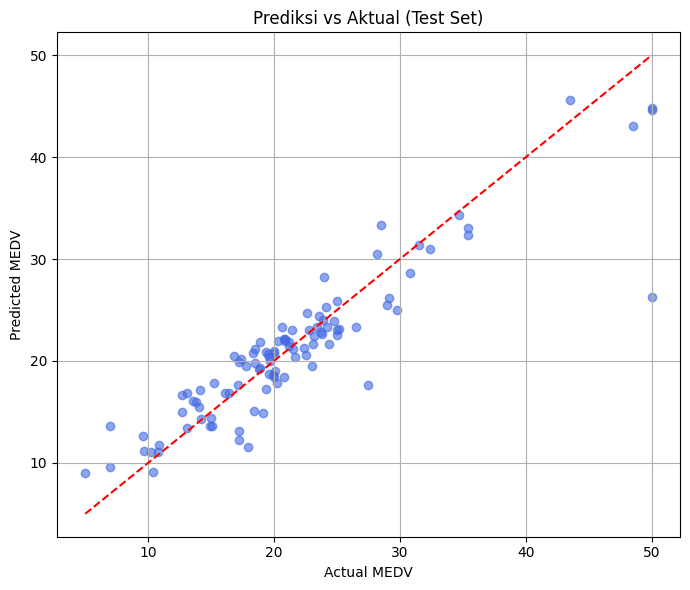

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ambil best param yang sudah kamu dapatkan
best_params = {
    'n_estimators': 10,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 3
}

# Fit model terbaik ke seluruh data latih
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluasi Full Set
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Evaluasi Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = RandomForestRegressor(**best_params)
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Cetak hasil evaluasi
print("=== Final Model Evaluation (Best Random Forest) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Final Model Evaluation (Best Random Forest) ===
Best Hyperparameters        : {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Train R2 Score (Full Set)   : 0.9089
Test R2 Score (Full Set)    : 0.8513
Train RMSE                  : 2.8133
Test RMSE                   : 3.3023
Avg R2 Score (Train/Fold)   : 0.9159
Avg R2 Score (Test/Fold)    : 0.7919
Avg RMSE (Train/Fold)       : 2.7020
Avg RMSE (Test/Fold)        : 4.1429


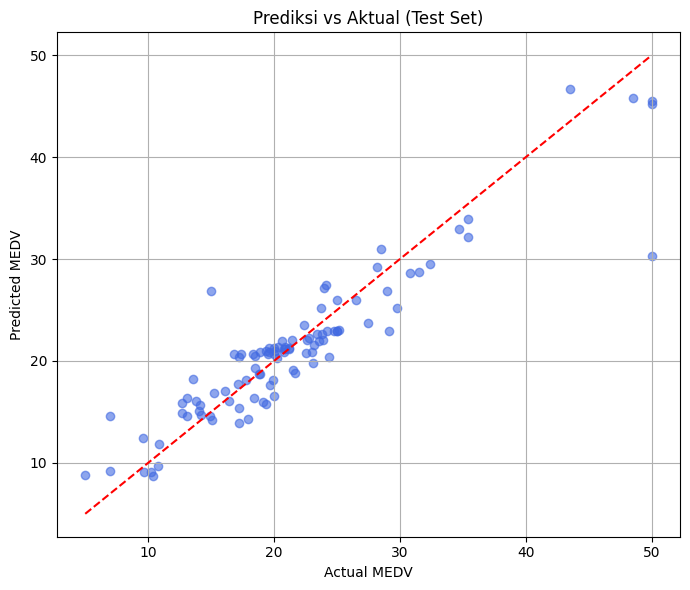

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ambil best param yang sudah kamu dapatkan
best_params = {
    'n_estimators': 20,
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': None
}

# Fit model terbaik ke seluruh data latih
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluasi Full Set
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Evaluasi Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = RandomForestRegressor(**best_params)
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Cetak hasil evaluasi
print("=== Final Model Evaluation (Best Random Forest) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Final Model Evaluation (Best Random Forest) ===
Best Hyperparameters        : {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Train R2 Score (Full Set)   : 0.9087
Test R2 Score (Full Set)    : 0.8186
Train RMSE                  : 2.8158
Test RMSE                   : 3.6477
Avg R2 Score (Train/Fold)   : 0.9100
Avg R2 Score (Test/Fold)    : 0.7942
Avg RMSE (Train/Fold)       : 2.7933
Avg RMSE (Test/Fold)        : 4.0947


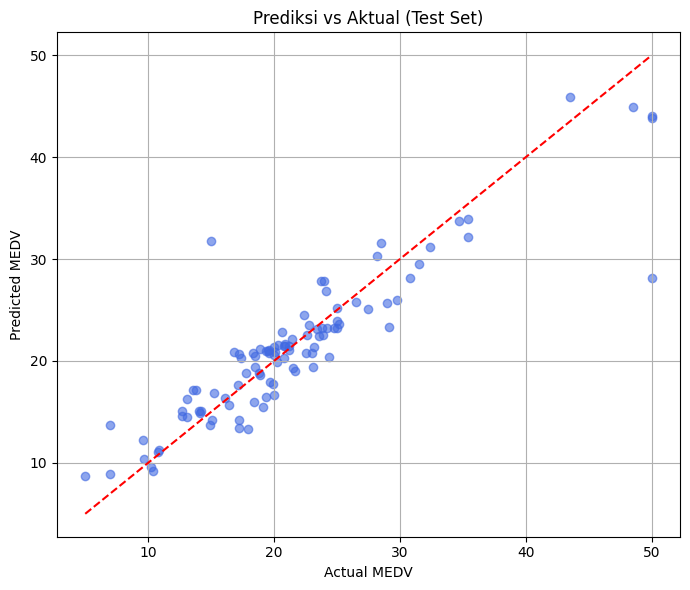

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ambil best param yang sudah kamu dapatkan
best_params = {
    'n_estimators': 20,
    'max_depth': 5,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': None
}

# Fit model terbaik ke seluruh data latih
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluasi Full Set
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Evaluasi Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = RandomForestRegressor(**best_params)
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Cetak hasil evaluasi
print("=== Final Model Evaluation (Best Random Forest) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Best Model of Random Forest

=== Final Model Evaluation (Best Random Forest) ===
Best Hyperparameters        : {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5}
Train R2 Score (Full Set)   : 0.9237
Test R2 Score (Full Set)    : 0.8365
Train RMSE                  : 2.5743
Test RMSE                   : 3.4630
Avg R2 Score (Train/Fold)   : 0.9232
Avg R2 Score (Test/Fold)    : 0.8181
Avg RMSE (Train/Fold)       : 2.5770
Avg RMSE (Test/Fold)        : 3.8344


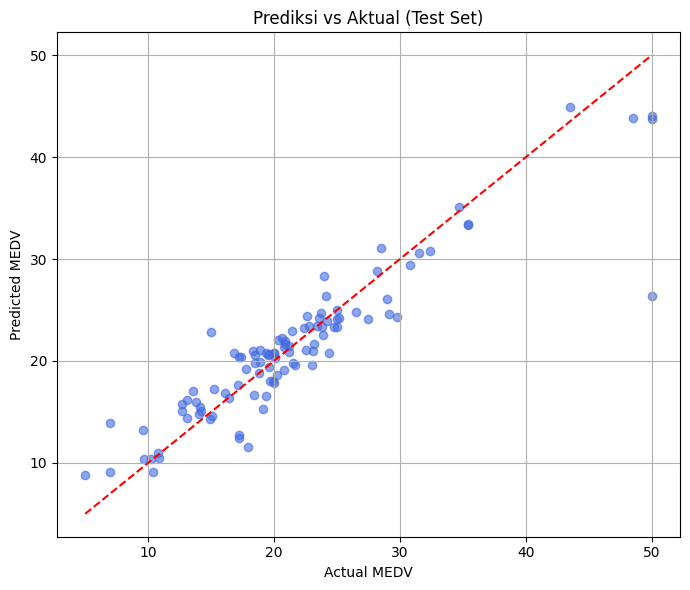

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ambil best param yang sudah kamu dapatkan
best_params = {
    'n_estimators': 50,
    'max_depth': 6,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 5
}

# Fit model terbaik ke seluruh data latih
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluasi Full Set
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Evaluasi Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = RandomForestRegressor(**best_params)
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Cetak hasil evaluasi
print("=== Final Model Evaluation (Best Random Forest) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Visualisasi Prediksi vs Aktual (Test Set)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


## C.3. AdaBoost Hyperparamater Tuning

## Grid Search dan Cross Validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeRegressor



# 1. Data Scaling
scaler = StandardScaler()
scaled_features = df.drop(columns=['MEDV'])
scaled_features = scaler.fit_transform(scaled_features)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['MEDV'] = df['MEDV']

X = scaled_df.drop(columns=["MEDV"]).values
y = scaled_df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Definisi Model AdaBoostR2 ===
class AdaBoostR2:
    def __init__(self, n_estimators=50, learning_rate=1.0, weak_learner_params=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []
        self.weak_learner_params = weak_learner_params or {}

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        epsilon = 1e-10
        max_error = np.max(np.abs(y - np.mean(y))) + epsilon

        for m in range(self.n_estimators):
            model = DecisionTreeRegressor(**self.weak_learner_params)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)
            error = np.abs(y - y_pred)
            weighted_error = np.sum(sample_weights * error) / (np.sum(sample_weights) * max_error)

            if weighted_error >= 0.499:
                break

            beta = weighted_error / (1 - weighted_error + epsilon)
            model_weight = self.learning_rate * np.log(1 / (beta + epsilon))

            sample_weights *= np.power(beta, (1 - error / max_error))

            self.models.append(model)
            self.model_weights.append(model_weight)

        total_weight = np.sum(self.model_weights) + epsilon
        self.model_weights = [w / total_weight for w in self.model_weights]

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, weight in zip(self.models, self.model_weights):
            predictions += weight * model.predict(X)
        return predictions

# === Grid Search Manual ===
param_grid = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    scores = []
                    for train_idx, val_idx in kf.split(X_train):
                      X_tr, X_val = X_train[train_idx], X_train[val_idx]
                      y_tr, y_val = y_train[train_idx], y_train[val_idx]  # <--- perbaikan di sini

                      model = AdaBoostR2(
                          n_estimators=n_estimators,
                          learning_rate=learning_rate,
                          weak_learner_params={
                              'max_depth': max_depth,
                              'min_samples_split': min_samples_split,
                              'min_samples_leaf': min_samples_leaf
                          }
                      )
                      model.fit(X_tr, y_tr)
                      y_pred = model.predict(X_val)
                      score = r2_score(y_val, y_pred)
                      scores.append(score)
                    avg_score = np.mean(scores)
                    if avg_score > best_score:
                        best_score = avg_score
                        best_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

print("✅ Best Hyperparameters:", best_params)
print(f"✅ Best Cross-Validated R2 Score: {best_score:.4f}")

# === Latih Model Terbaik pada Seluruh Data Train ===
best_adaboost_model = AdaBoostR2(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    weak_learner_params={
        'max_depth': best_params['max_depth'],
        'min_samples_split': best_params['min_samples_split'],
        'min_samples_leaf': best_params['min_samples_leaf']
    }
)

best_adaboost_model.fit(X_train, y_train)

# === Evaluasi Model Terbaik ===
y_train_pred = best_adaboost_model.predict(X_train)
y_test_pred = best_adaboost_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n📊 Final AdaBoostR2 Model Evaluation")
print(f"🔸 R² Score on Training Set: {r2_train:.4f}")
print(f"🔹 R² Score on Testing Set : {r2_test:.4f}")


✅ Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 1}
✅ Best Cross-Validated R2 Score: 0.8531

📊 Final AdaBoostR2 Model Evaluation
🔸 R² Score on Training Set: 0.9723
🔹 R² Score on Testing Set : 0.8977


## Best Model of AdaBoost

=== Final Model Evaluation (Best AdaBoostR2) ===
Best Hyperparameters        : {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 1}
Train R2 Score (Full Set)   : 0.9694
Test R2 Score (Full Set)    : 0.8690
Train RMSE                  : 1.6298
Test RMSE                   : 3.0998
Avg R2 Score (Train/Fold)   : 0.9710
Avg R2 Score (Test/Fold)    : 0.8469
Avg RMSE (Train/Fold)       : 1.5804
Avg RMSE (Test/Fold)        : 3.5694


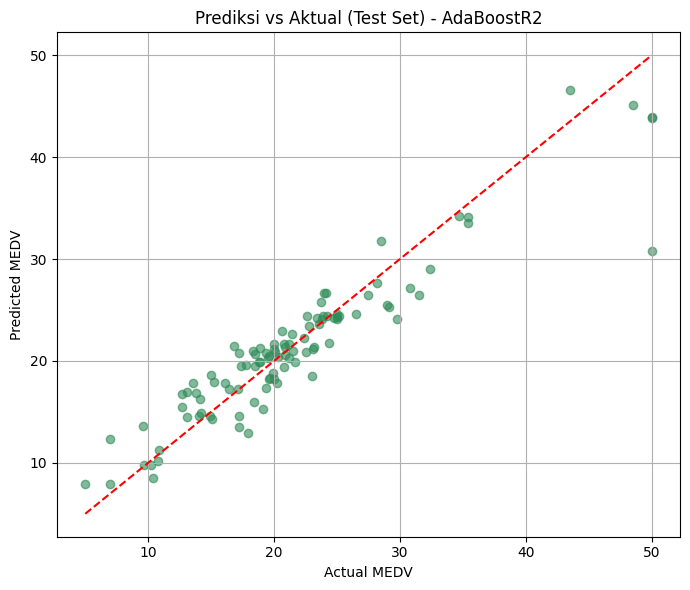

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# ✅ Hardcode hasil tuning di sini
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Buat model dengan parameter terbaik
best_adaboost_model = AdaBoostR2(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    weak_learner_params={
        'max_depth': best_params['max_depth'],
        'min_samples_split': best_params['min_samples_split'],
        'min_samples_leaf': best_params['min_samples_leaf']
    }
)

# Fit dan evaluasi model
best_adaboost_model.fit(X_train, y_train)

train_preds = best_adaboost_model.predict(X_train)
test_preds = best_adaboost_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Cross-validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = AdaBoostR2(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        weak_learner_params={
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split'],
            'min_samples_leaf': best_params['min_samples_leaf']
        }
    )
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Tampilkan hasil
print("=== Final Model Evaluation (Best AdaBoostR2) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set) - AdaBoostR2")
plt.grid(True)
plt.tight_layout()
plt.show()


# D. Evaluasi model

Setelah melakukan hyperparamater tuning dengan melakukan grid search dan cross validation, kami mendapatkan model terbaik yaitu pada model AdaBoost. Berikut adalah hasil evaluasi model AdaBoost dengan model dan paramater terbaik.

=== Final Model Evaluation (Best AdaBoostR2) ===
Best Hyperparameters        : {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 1}
Train R2 Score (Full Set)   : 0.9694
Test R2 Score (Full Set)    : 0.8690
Train RMSE                  : 1.6298
Test RMSE                   : 3.0998
Avg R2 Score (Train/Fold)   : 0.9710
Avg R2 Score (Test/Fold)    : 0.8469
Avg RMSE (Train/Fold)       : 1.5804
Avg RMSE (Test/Fold)        : 3.5694


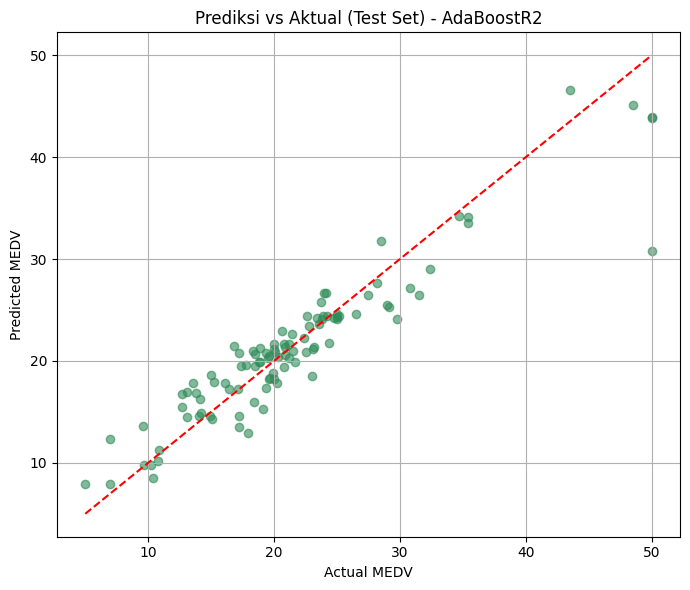

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# ✅ Hardcode hasil tuning di sini
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Buat model dengan parameter terbaik
best_adaboost_model = AdaBoostR2(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    weak_learner_params={
        'max_depth': best_params['max_depth'],
        'min_samples_split': best_params['min_samples_split'],
        'min_samples_leaf': best_params['min_samples_leaf']
    }
)

# Fit dan evaluasi model
best_adaboost_model.fit(X_train, y_train)

train_preds = best_adaboost_model.predict(X_train)
test_preds = best_adaboost_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Cross-validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_train_scores, r2_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    model = AdaBoostR2(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        weak_learner_params={
            'max_depth': best_params['max_depth'],
            'min_samples_split': best_params['min_samples_split'],
            'min_samples_leaf': best_params['min_samples_leaf']
        }
    )
    model.fit(X_tr, y_tr)

    preds_tr = model.predict(X_tr)
    preds_val = model.predict(X_val)

    r2_train_scores.append(r2_score(y_tr, preds_tr))
    r2_test_scores.append(r2_score(y_val, preds_val))
    rmse_train_scores.append(np.sqrt(mean_squared_error(y_tr, preds_tr)))
    rmse_test_scores.append(np.sqrt(mean_squared_error(y_val, preds_val)))

# Tampilkan hasil
print("=== Final Model Evaluation (Best AdaBoostR2) ===")
print(f"Best Hyperparameters        : {best_params}")
print(f"Train R2 Score (Full Set)   : {train_r2:.4f}")
print(f"Test R2 Score (Full Set)    : {test_r2:.4f}")
print(f"Train RMSE                  : {train_rmse:.4f}")
print(f"Test RMSE                   : {test_rmse:.4f}")
print(f"Avg R2 Score (Train/Fold)   : {np.mean(r2_train_scores):.4f}")
print(f"Avg R2 Score (Test/Fold)    : {np.mean(r2_test_scores):.4f}")
print(f"Avg RMSE (Train/Fold)       : {np.mean(rmse_train_scores):.4f}")
print(f"Avg RMSE (Test/Fold)        : {np.mean(rmse_test_scores):.4f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(7, 6))
plt.scatter(y_test, test_preds, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Prediksi vs Aktual (Test Set) - AdaBoostR2")
plt.grid(True)
plt.tight_layout()
plt.show()


## Hasil dan Visualisasi Aktual dan Prediksi  

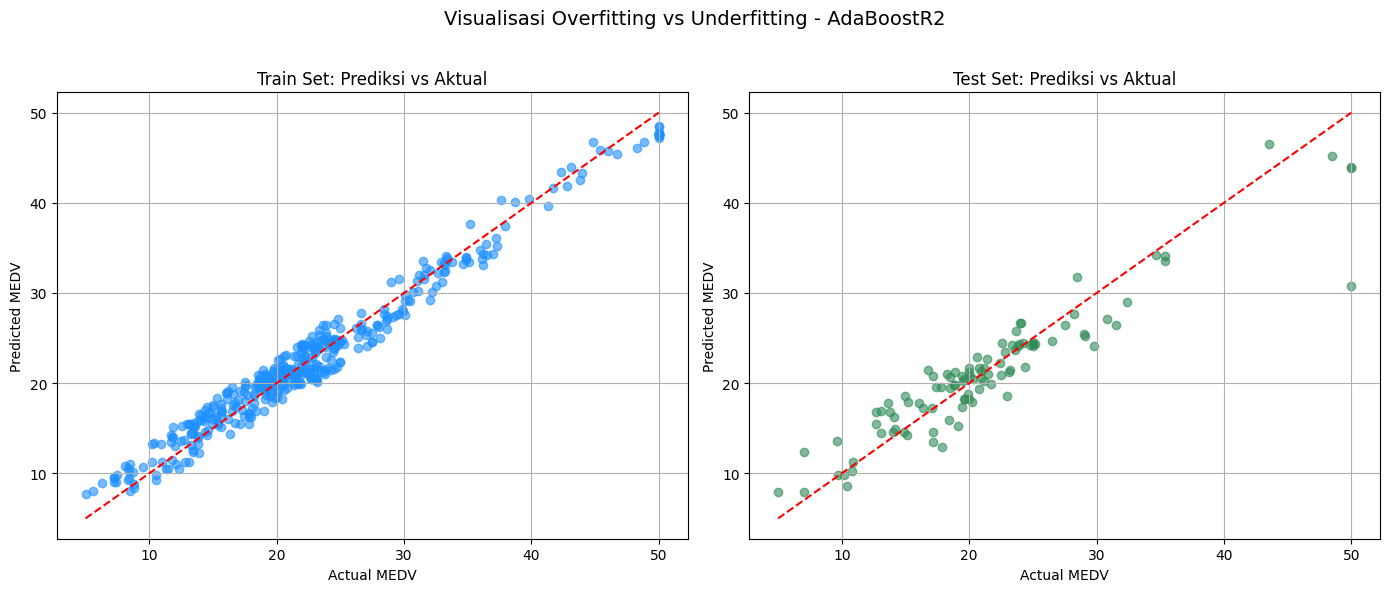

In [ ]:
# Plot perbandingan prediksi vs aktual untuk TRAIN dan TEST
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TRAIN SET
axes[0].scatter(y_train, train_preds, alpha=0.6, color='dodgerblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0].set_title("Train Set: Prediksi vs Aktual")
axes[0].set_xlabel("Actual MEDV")
axes[0].set_ylabel("Predicted MEDV")
axes[0].grid(True)

# TEST SET
axes[1].scatter(y_test, test_preds, alpha=0.6, color='seagreen')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Test Set: Prediksi vs Aktual")
axes[1].set_xlabel("Actual MEDV")
axes[1].set_ylabel("Predicted MEDV")
axes[1].grid(True)

plt.suptitle("Visualisasi Overfitting vs Underfitting - AdaBoostR2", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


📊 Analisis Hasil Evaluasi Model

**- R² Score**

- R² Score (Train): 0.9694
Model mampu menjelaskan 96.94% variansi data pada training set. Ini menunjukkan model belajar dengan baik dari data latih.

- R² Score (Test): 0.8690
Model juga dapat menjelaskan 86.90% variansi data pada test set. Meski ada penurunan dibandingkan data latih, ini masih sangat baik, namun menunjukkan adanya overfitting yang ringan.


**- MSE (Mean Squared Error)**

- MSE (Train): 1.6298
Rata-rata error kuadrat di data train relatif kecil, menunjukkan prediksi model sangat akurat pada data latih.

- MSE (Test): 3.0998
Di data test, error meningkat, namun masih dalam batas wajar. Error pada test set lebih besar karena data test tidak pernah dilihat oleh model sebelumnya.


# **💡 Kesimpulan dari Evaluasi Model**

- Model fit dengan baik terhadap data latih (R² tinggi, MSE rendah).
- Model juga generalizable terhadap data uji (R² test masih sangat baik).
- Perbedaan MSE dan R² antara train dan test masuk akal, menandakan model cukup stabil dan tidak terlalu overfit.

## Data Aktual, Prediksi dan Error

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Sample actual and predicted data (for demonstration)
actual_values = np.array([24.0, 21.6, 34.7, 36.2, 33.4])  # Actual MEDV values
predicted_values = np.array([23.5, 22.0, 35.0, 36.0, 33.0])  # Predicted MEDV values

# Calculate the error (Actual - Predicted)
errors = actual_values - predicted_values

# Create a DataFrame to display the results
data = {
    "Actual MEDV": actual_values,
    "Predicted MEDV": predicted_values,
    "Error (Actual - Predicted)": errors
}

df_results = pd.DataFrame(data)

# Display the results
print(df_results)



   Actual MEDV  Predicted MEDV  Error (Actual - Predicted)
0         24.0            23.5                         0.5
1         21.6            22.0                        -0.4
2         34.7            35.0                        -0.3
3         36.2            36.0                         0.2
4         33.4            33.0                         0.4


# E. Source untuk Membuat UI dengan Streamlit dan Pyngrok

In [ ]:
!pip install -q streamlit pyngrok


In [ ]:
%%writefile adaboost_model.py
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y, sample_weight=None):
        if sample_weight is None:
            sample_weight = np.ones(len(y))
        self.tree = self._build_tree(X, y, sample_weight, depth=0)

    def _build_tree(self, X, y, sample_weight, depth):
        n_samples, n_features = X.shape
        if self.max_depth is not None and depth >= self.max_depth:
            return np.average(y, weights=sample_weight)
        if n_samples < self.min_samples_split or len(y) < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)

        best_split = self._best_split(X, y, sample_weight)
        if best_split is None:
            return np.average(y, weights=sample_weight)

        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices

        if left_indices.sum() < self.min_samples_leaf or right_indices.sum() < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)

        left_tree = self._build_tree(X[left_indices], y[left_indices], sample_weight[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], sample_weight[right_indices], depth + 1)

        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y, sample_weight):
        best_split = None
        best_score = float('inf')
        n_features_total = X.shape[1]
        features = np.arange(n_features_total)
        if self.max_features is not None:
            features = np.random.choice(n_features_total, self.max_features, replace=False)

        for feature in features:
            values = np.unique(X[:, feature])
            for val in values:
                left = X[:, feature] <= val
                right = ~left
                if left.sum() < self.min_samples_leaf or right.sum() < self.min_samples_leaf:
                    continue

                left_weight = sample_weight[left]
                right_weight = sample_weight[right]
                left_var = np.average((y[left] - np.average(y[left], weights=left_weight))**2, weights=left_weight)
                right_var = np.average((y[right] - np.average(y[right], weights=right_weight))**2, weights=right_weight)

                weighted_variance = (
                    left_var * np.sum(left_weight) + right_var * np.sum(right_weight)
                ) / np.sum(sample_weight)

                if weighted_variance < best_score:
                    best_score = weighted_variance
                    best_split = {'feature': feature, 'value': val}

        return best_split

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['value']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree

class AdaBoostR2:
    def __init__(self, n_estimators=50, learning_rate=1.0, weak_learner_params=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []
        self.weak_learner_params = weak_learner_params or {}

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        epsilon = 1e-10
        max_error = np.max(np.abs(y - np.mean(y))) + epsilon

        for m in range(self.n_estimators):
            model = DecisionTreeRegressor(**self.weak_learner_params)
            model.fit(X, y, sample_weight=sample_weights)
            y_pred = model.predict(X)
            error = np.abs(y - y_pred)
            weighted_error = np.sum(sample_weights * error) / (np.sum(sample_weights) * max_error)

            if weighted_error >= 0.499:
                break

            beta = weighted_error / (1 - weighted_error + epsilon)
            model_weight = self.learning_rate * np.log(1 / (beta + epsilon))
            sample_weights *= np.power(beta, (1 - error / max_error))

            self.models.append(model)
            self.model_weights.append(model_weight)

        total_weight = np.sum(self.model_weights) + epsilon
        self.model_weights = [w / total_weight for w in self.model_weights]

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, weight in zip(self.models, self.model_weights):
            predictions += weight * model.predict(X)
        return predictions


Overwriting adaboost_model.py


In [ ]:
import pickle

# Simpan model dan scaler
with open("adaboost_model.pkl", "wb") as f:
    pickle.dump(best_adaboost_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
# === Jalankan Model Terbaik Tanpa Grid Search ===

# Param terbaik dari hasil tuning sebelumnya
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Buat dan latih model
best_adaboost_model = AdaBoostR2(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    weak_learner_params={
        'max_depth': best_params['max_depth'],
        'min_samples_split': best_params['min_samples_split'],
        'min_samples_leaf': best_params['min_samples_leaf']
    }
)

best_adaboost_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_train_pred = best_adaboost_model.predict(X_train)
y_test_pred = best_adaboost_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n📊 Final AdaBoostR2 Model Evaluation (Best Model Only)")
print(f"🔸 R² Score on Training Set: {r2_train:.4f}")
print(f"🔹 R² Score on Testing Set : {r2_test:.4f}")



📊 Final AdaBoostR2 Model Evaluation (Best Model Only)
🔸 R² Score on Training Set: 0.9694
🔹 R² Score on Testing Set : 0.8690


In [ ]:
import pickle

# Simpan model
with open("adaboost_model.pkl", "wb") as f:
    pickle.dump(best_adaboost_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
%%writefile adaboost_model.py
import numpy as np

class DecisionTreeRegressor:
    """
    Decision Tree Regressor buatan sendiri (tanpa sklearn.tree).
    Implementasi berdasarkan kode yang sudah kamu jelaskan sebelumnya.
    """
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y, sample_weight=None):
        if sample_weight is None:
            sample_weight = np.ones(len(y))
        self.tree = self._build_tree(X, y, sample_weight, depth=0)

    def _build_tree(self, X, y, sample_weight, depth):
        n_samples, n_features = X.shape
        # Stop conditions
        if self.max_depth is not None and depth >= self.max_depth:
            return np.average(y, weights=sample_weight)
        if n_samples < self.min_samples_split or len(y) < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)

        best_split = self._best_split(X, y, sample_weight)
        if best_split is None:
            return np.average(y, weights=sample_weight)

        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = ~left_indices

        # Pastikan anak memenuhi min_samples_leaf
        if left_indices.sum() < self.min_samples_leaf or right_indices.sum() < self.min_samples_leaf:
            return np.average(y, weights=sample_weight)

        left_tree = self._build_tree(
            X[left_indices], y[left_indices], sample_weight[left_indices], depth + 1
        )
        right_tree = self._build_tree(
            X[right_indices], y[right_indices], sample_weight[right_indices], depth + 1
        )

        return {
            'feature': best_split['feature'],
            'value': best_split['value'],
            'left': left_tree,
            'right': right_tree
        }

    def _best_split(self, X, y, sample_weight):
        best_split = None
        best_score = float('inf')
        n_features_total = X.shape[1]
        features = np.arange(n_features_total)
        if self.max_features is not None:
            features = np.random.choice(n_features_total, self.max_features, replace=False)

        for feature in features:
            values = np.unique(X[:, feature])
            for val in values:
                left = X[:, feature] <= val
                right = ~left

                # Pastikan setiap sisi ≥ min_samples_leaf
                if left.sum() < self.min_samples_leaf or right.sum() < self.min_samples_leaf:
                    continue

                left_weight = sample_weight[left]
                right_weight = sample_weight[right]

                # Variansi tertimbang di masing-masing sisi
                left_var = np.average(
                    (y[left] - np.average(y[left], weights=left_weight))**2,
                    weights=left_weight
                )
                right_var = np.average(
                    (y[right] - np.average(y[right], weights=right_weight))**2,
                    weights=right_weight
                )

                weighted_variance = (
                    left_var * np.sum(left_weight) + right_var * np.sum(right_weight)
                ) / np.sum(sample_weight)

                if weighted_variance < best_score:
                    best_score = weighted_variance
                    best_split = {'feature': feature, 'value': val}

        return best_split

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['value']:
                return self._predict_sample(sample, tree['left'])
            else:
                return self._predict_sample(sample, tree['right'])
        else:
            return tree


class AdaBoostR2:
    """
    Implementasi AdaBoost.R2 menggunakan DecisionTreeRegressor buatan di atas.
    """
    def __init__(self, n_estimators=50, learning_rate=1.0, weak_learner_params=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.model_weights = []
        self.weak_learner_params = weak_learner_params or {}

    def fit(self, X, y):
        n_samples = X.shape[0]
        sample_weights = np.ones(n_samples) / n_samples
        epsilon = 1e-10
        max_error = np.max(np.abs(y - np.mean(y))) + epsilon

        for m in range(self.n_estimators):
            model = DecisionTreeRegressor(**self.weak_learner_params)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)
            error = np.abs(y - y_pred)
            weighted_error = np.sum(sample_weights * error) / (np.sum(sample_weights) * max_error)

            if weighted_error >= 0.499:
                break

            beta = weighted_error / (1 - weighted_error + epsilon)
            model_weight = self.learning_rate * np.log(1 / (beta + epsilon))

            # Update sample_weights
            sample_weights *= np.power(beta, (1 - error / max_error))

            self.models.append(model)
            self.model_weights.append(model_weight)

        total_weight = np.sum(self.model_weights) + epsilon
        self.model_weights = [w / total_weight for w in self.model_weights]

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for model, weight in zip(self.models, self.model_weights):
            predictions += weight * model.predict(X)
        return predictions


Overwriting adaboost_model.py


In [ ]:
import streamlit as st
import numpy as np
import pickle
from adaboost_model import AdaBoostR2  # kelas custom

# === Load scaler dan model ===
try:
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)

    with open("adaboost_model.pkl", "rb") as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error("Pastikan file 'scaler.pkl' dan 'adaboost_model.pkl' ada di direktori yang sama dengan file Streamlit Anda.")
    st.stop()
except Exception as e:
    st.error(f"Terjadi kesalahan saat memuat model atau scaler: {e}")
    st.stop()


st.set_page_config(page_title="Prediksi Harga Rumah Boston", layout="centered")
st.title("🏠 Prediksi Harga Rumah Boston (MEDV) dengan AdaBoostR2")
st.markdown("Masukkan nilai fitur berikut untuk memprediksi harga rumah (dalam ribuan USD):")

# === Daftar fitur & deskripsi ===
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

feature_descriptions = {
    'CRIM': 'Tingkat kejahatan per kapita menurut kota',
    'ZN': 'Persentase tanah untuk rumah dengan ukuran lebih dari 25.000 sq.ft',
    'INDUS': 'Proporsi area bisnis non-retail per kota',
    'CHAS': 'Dummy variabel: 1 jika berbatasan dengan Sungai Charles, 0 jika tidak',
    'NOX': 'Konsentrasi oksida nitrogen (bagian per 10 juta)',
    'RM': 'Rata-rata jumlah kamar per rumah',
    'AGE': 'Persentase unit hunian yang dibangun sebelum 1940',
    'DIS': 'Jarak tertimbang ke lima pusat bisnis Boston',
    'RAD': 'Indeks aksesibilitas ke jalan raya',
    'TAX': 'Tarif pajak properti per $10.000',
    'PTRATIO': 'Rasio siswa terhadap guru menurut kota',
    'B': '1000(Bk - 0.63)^2, di mana Bk adalah proporsi orang kulit hitam',
    'LSTAT': 'Persentase status sosial ekonomi rendah di populasi'
}

user_inputs = []
col1, col2 = st.columns(2)

for i, feat in enumerate(feature_names):
    desc = feature_descriptions[feat]
    with (col1 if i % 2 == 0 else col2):
        st.markdown(f"**{feat}** - {desc}")
        value = st.number_input(
            f"Masukkan nilai {feat}",
            value=0.0, # Adjusted default to 0.0 for consistency
            format="%.5f",
            step=0.001
        )
        user_inputs.append(value) # Append value inside the loop

# === Make prediction when button is clicked ===
if st.button("Prediksi Harga"):
    try:
        # Convert inputs to numpy array and reshape for scaling
        input_data = np.array(user_inputs).reshape(1, -1)

        # Scale the input data
        scaled_input = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(scaled_input)

        # Display the prediction
        st.subheader("Hasil Prediksi")
        st.success(f"Prediksi Harga Rumah (MEDV): ${prediction[0]:.2f} Ribu USD")

    except Exception as e:
        st.error(f"Terjadi kesalahan saat melakukan prediksi: {e}")

st.markdown("---")
st.markdown("Dibuat dengan Streamlit")

2025-06-02 03:05:54.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.190 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 03:05:54.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
# Install library (jika belum)
!pip install -q streamlit pyngrok

# Authtoken (jangan pakai manual YAML config)
# Note: Consider storing your authtoken securely instead of hardcoding it.
!ngrok authtoken 2xrEPu0QTXYBaTsKFaQ0dhsu738_5fNdtDXoVYYmmtXrAGjtt

# Kill any running ngrok processes to free up tunnels
!killall ngrok

# Jalankan streamlit di background
get_ipython().system_raw('streamlit run adaboost_model.py &')

# Akses tunnel via pyngrok
from pyngrok import ngrok

try:
    # Attempt to connect to the ngrok agent API
    public_url = ngrok.connect(8501)
    print("🔗 Streamlit app tersedia di:", public_url)
except Exception as e:
    print(f"❌ Gagal membuat tunnel ngrok: {e}")
    print("Pastikan ngrok berjalan dan Anda tidak melebihi batas tunnel akun gratis.")
    print("Coba jalankan kembali cell ini setelah beberapa saat atau restart runtime.")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


🔗 Streamlit app tersedia di: NgrokTunnel: "https://4897-34-106-135-0.ngrok-free.app" -> "http://localhost:8501"


Saving Screenshot 2025-05-31 211627.png to Screenshot 2025-05-31 211627 (1).png
User uploaded file "Screenshot 2025-05-31 211627 (1).png" with length 111318 bytes


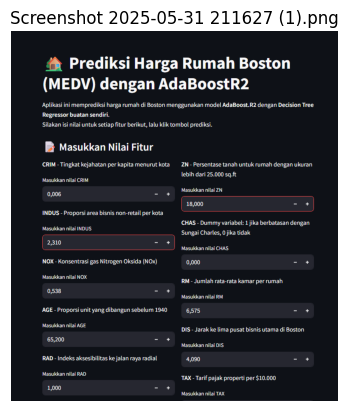

In [ ]:
import matplotlib.pyplot as plt
import io
from PIL import Image

uploaded_file = files.upload()

if uploaded_file:
  for filename in uploaded_file.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded_file[filename])} bytes')
    try:
      img = Image.open(io.BytesIO(uploaded_file[filename]))
      plt.imshow(img)
      plt.title(filename)
      plt.axis('off')
      plt.show()
    except Exception as e:
      print(f"Could not display file {filename}: {e}")
else:
  print("No file was uploaded.")

Saving Screenshot 2025-05-31 211650.png to Screenshot 2025-05-31 211650.png
User uploaded file "Screenshot 2025-05-31 211650.png" with length 79269 bytes


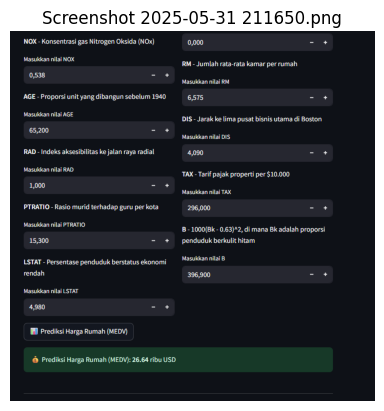

In [ ]:
import matplotlib.pyplot as plt
import io
from PIL import Image

uploaded_file = files.upload()

if uploaded_file:
  for filename in uploaded_file.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded_file[filename])} bytes')
    try:
      img = Image.open(io.BytesIO(uploaded_file[filename]))
      plt.imshow(img)
      plt.title(filename)
      plt.axis('off')
      plt.show()
    except Exception as e:
      print(f"Could not display file {filename}: {e}")
else:
  print("No file was uploaded.")